### Предсказание цен на недвижимость

В этой ячейке вы найдете оглавление и ключевые этапы работы, которые помогут вам ориентироваться в процессе выполнения проекта. Проект разделен на пять основных этапов, четыре из которых (этапы 2, 3, 4 и 5) вам предлагается выполнить в этом Jupyter Notebook:

- Подготовка среды MLflow - Первый шаг, подготовка и запуск сервисов MLflow, был выполнен вне ноутбука и оформлен в виде shell скрипта. Это основа для работы с экспериментами и логирования результатов ваших моделей.

- Этап 2 - Исследовательский Анализ Данных (EDA): На этом этапе вы проведете тщательный анализ данных, чтобы лучше понять их структуру и особенности.

- Этап 3 - Генерация Признаков и Обучение Модели: После анализа данных вы сгенерируете новые признаки и обучите модель, используя эти признаки.

- Этап 4 - Отбор Признаков и Обучение Модели: На этом шаге вы отберете наиболее значимые признаки и снова обучите модель для улучшения ее качества.

- Этап 5 - Подбор Гиперпараметров и Обучение Финальной Версии Модели: Финальный этап проекта посвящен оптимизации гиперпараметров для достижения максимального качества модели.

Для удобства навигации и организации работы, пожалуйста, следуйте оглавлению и рекомендациям, описанным в каждом этапе.

> ### Важно: Переобучение моделей
> На каждом этапе проекта, где требуется переобучение модели, важно не просто выполнить эту процедуру, но и тщательно проверить качество модели на соответствующих выборках. Это включает в себя анализ метрик качества, визуализацию результатов, сравнение с предыдущими моделями и, при необходимости, корректировку.

> ### Важно: Разделение выборок
> Перед началом выполнения вашего проекта важно правильно подготовить данные, разделив их на подвыборки. Это позволит оценить производительность модели более объективно и управлять риском переобучения. В зависимости от ваших целей и доступных данных, вы можете использовать различные стратегии разделения:

1. Разделение на train/val/test: Это классический подход, где данные делятся на три части. Обучающая выборка (train) используется для первичного обучения моделей, валидационная (val) - для настройки гиперпараметров и выбора лучшей модели, а тестовая (test) - для финальной оценки производительности модели. Такой подход идеален, если у вас достаточно данных, чтобы разделить их и каждая из выборок была репрезентативна.

2. Разделение на train/test с кросс-валидацией на train: Если данных недостаточно для трех подвыборок, можно ограничиться разделением на обучающую и тестовую выборки. В этом случае кросс-валидация на обучающей выборке поможет оценить стабильность модели и подобрать гиперпараметры.

Определение способа разделения данных: Выбор метода разбиения данных на подвыборки — train, validation и test — должен быть обоснован особенностями вашего набора данных и задачами проекта. Возможные методы разделения, включая различные стратегии и правила, подробно описаны в [документации scikit-learn по разбиению данных](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py). Вы можете следовать этим примерам или разработать собственный метод, исходя из специфики ваших данных.

Ваша задача - выбрать подходящий метод разделения данных исходя из объема и специфики ваших данных. Помните, что финальные метрики качества модели мы будем оценивать на тестовой выборке. Промежуточные результаты после каждого этапа проекта (например, после настройки гиперпараметров) следует оценивать на валидационной выборке, если таковая имеется. Это поможет вам корректно настроить модель перед финальной оценкой её производительности.

In [ ]:
# сделайте разделение изначального набора данных в этой ячейке
X_train, y_train, X_rest, y_rest = train_test_split(X, y, test_size=0.4, random_seed=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_seed=42)

#### Этап 2: Исследовательский Анализ Данных (EDA)
На этом этапе ваша задача - провести тщательный исследовательский анализ данных (EDA), чтобы глубже понять особенности и связи в предоставленном наборе данных. В процессе EDA вы должны обратить внимание на три ключевых аспекта, о которых мы говорили в теме 3 курса. Очень важно, чтобы все результаты вашего исследования, включая визуализации, статистический анализ и предварительные выводы, были аккуратно залогированы в MLflow.

Для более организованного исследования предлагаем следующие рекомендуемые шаги:
- Понимание данных: Первоначально ознакомьтесь с данными, изучите типы данных, проверьте наличие пропущенных значений.
- Визуализация данных: Используйте графики и диаграммы для визуализации распределений признаков и возможных взаимосвязей между ними.
- Статистический анализ: Примените статистические методы для изучения центральных тенденций, разброса и корреляций между признаками.
- Предварительные выводы: На основе проведённого анализа сформулируйте предварительные выводы о данных, которые помогут в дальнейшем этапе моделирования.

Помните, что EDA - это итеративный процесс, в котором вы можете возвращаться к предыдущим шагам для дополнительного анализа, если это будет необходимо. Все находки и выводы должны быть чётко зафиксированы и легко доступны для команды проекта.


### 2.1 Загрузка данных

In [1]:
import pandas as pd 
import psycopg2
import os

TABLE_NAME='clean_data'

connection = {"sslmode": "require", "target_session_attrs": "read-write"}
postgres_credentials = {
    "host": os.getenv("DB_DESTINATION_HOST"),
    "port": os.getenv("DB_DESTINATION_PORT"),
    "dbname": os.getenv("DB_DESTINATION_NAME"),
    "user": os.getenv("DB_DESTINATION_USER"),
    "password": os.getenv("DB_DESTINATION_PASSWORD"),
}

connection.update(postgres_credentials)

with psycopg2.connect(**connection) as conn:
    with conn.cursor() as cur:
        cur.execute(f"SELECT * FROM {TABLE_NAME}")
        data = cur.fetchall()
        columns = [col[0] for col in cur.description]

df = pd.DataFrame(data, columns=columns)

df.head(2)

,flat_id,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,studio,total_area,price
0,61418,14068,1984,4,55.620132,37.696228,2.64,304,14,True,14,8.8,21.000000,1,False,False,40.700001,8500000.0
1,61420,14609,1986,4,55.680977,37.773376,2.65,111,14,True,14,8.5,20.799999,1,False,False,40.700001,8650000.0


### 2.2. Общий обзор датасета

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ASSETS_DIR = "assets"

os.makedirs(ASSETS_DIR, exist_ok=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97047 entries, 0 to 97046
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flat_id            97047 non-null  int64  
 1   building_id        97047 non-null  int64  
 2   build_year         97047 non-null  int64  
 3   building_type_int  97047 non-null  int64  
 4   latitude           97047 non-null  float64
 5   longitude          97047 non-null  float64
 6   ceiling_height     97047 non-null  float64
 7   flats_count        97047 non-null  int64  
 8   floors_total       97047 non-null  int64  
 9   has_elevator       97047 non-null  bool   
 10  floor              97047 non-null  int64  
 11  kitchen_area       97047 non-null  float64
 12  living_area        97047 non-null  float64
 13  rooms              97047 non-null  int64  
 14  is_apartment       97047 non-null  bool   
 15  studio             97047 non-null  bool   
 16  total_area         970

In [3]:
# Количество признаков по типу
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns
bool_features = df.select_dtypes(include=['bool']).columns

print(f"Number of numeric features: {len(num_features)}")
print(f"Number of categorical features: {len(cat_features)}")
print(f"Number of boolean features: {len(bool_features)}")

Number of numeric features: 15
Number of categorical features: 0
Number of boolean features: 3


In [4]:
# Переводим булевые признаки в int
df[bool_features] = df[bool_features].astype(int)

features = list(num_features) + list(bool_features)

In [5]:
df.describe()

,flat_id,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,studio,total_area,price
count,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.000000,97047.0,97047.000000,9.704700e+04
mean,69615.562593,13143.126361,1984.055643,3.527178,55.728475,37.604175,2.686729,222.442744,13.000556,0.892753,6.724360,8.084635,27.537852,1.943306,0.005214,0.0,51.476963,1.178503e+07
std,41219.988347,6425.506895,19.319651,1.416485,0.103440,0.148834,0.130428,133.333780,5.113783,0.309429,4.502114,2.984061,14.324950,0.813441,0.072020,0.0,16.103785,4.449464e+06
min,0.000000,256.000000,1914.000000,0.000000,55.427238,37.190639,2.450000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,11.000000,6.000000e+05
25%,33522.500000,8132.500000,1969.000000,4.000000,55.648901,37.495975,2.640000,111.000000,9.000000,1.000000,3.000000,6.000000,19.000000,1.000000,0.000000,0.0,38.300000,8.500000e+06
50%,69586.000000,12785.000000,1979.000000,4.000000,55.717854,37.591702,2.640000,192.000000,12.000000,1.000000,6.000000,8.400000,28.400000,2.000000,0.000000,0.0,48.000000,1.080000e+07
75%,104961.500000,18499.000000,2002.000000,4.000000,55.814205,37.722549,2.700000,298.000000,17.000000,1.000000,9.000000,10.000000,36.000000,3.000000,0.000000,0.0,60.299999,1.400000e+07
max,141361.000000,24620.000000,2023.000000,6.000000,56.011032,37.946411,3.000000,638.000000,29.000000,1.000000,20.000000,16.300000,74.000000,5.000000,1.000000,0.0,118.500000,2.840000e+07


In [6]:
# Количество нулевых значений
df.isna().sum()

flat_id              0
building_id          0
build_year           0
building_type_int    0
latitude             0
longitude            0
ceiling_height       0
flats_count          0
floors_total         0
has_elevator         0
floor                0
kitchen_area         0
living_area          0
rooms                0
is_apartment         0
studio               0
total_area           0
price                0
dtype: int64

### 2.3 Анализ признаков для модели

In [7]:
df[features].nunique()

flat_id              97047
building_id          20224
build_year             103
building_type_int        6
latitude             14262
longitude            13923
ceiling_height          34
flats_count            588
floors_total            29
floor                   20
kitchen_area           521
living_area           1333
rooms                    5
total_area            1738
price                 3693
has_elevator             2
is_apartment             2
studio                   1
dtype: int64

In [5]:
sns.set_palette("tab10")

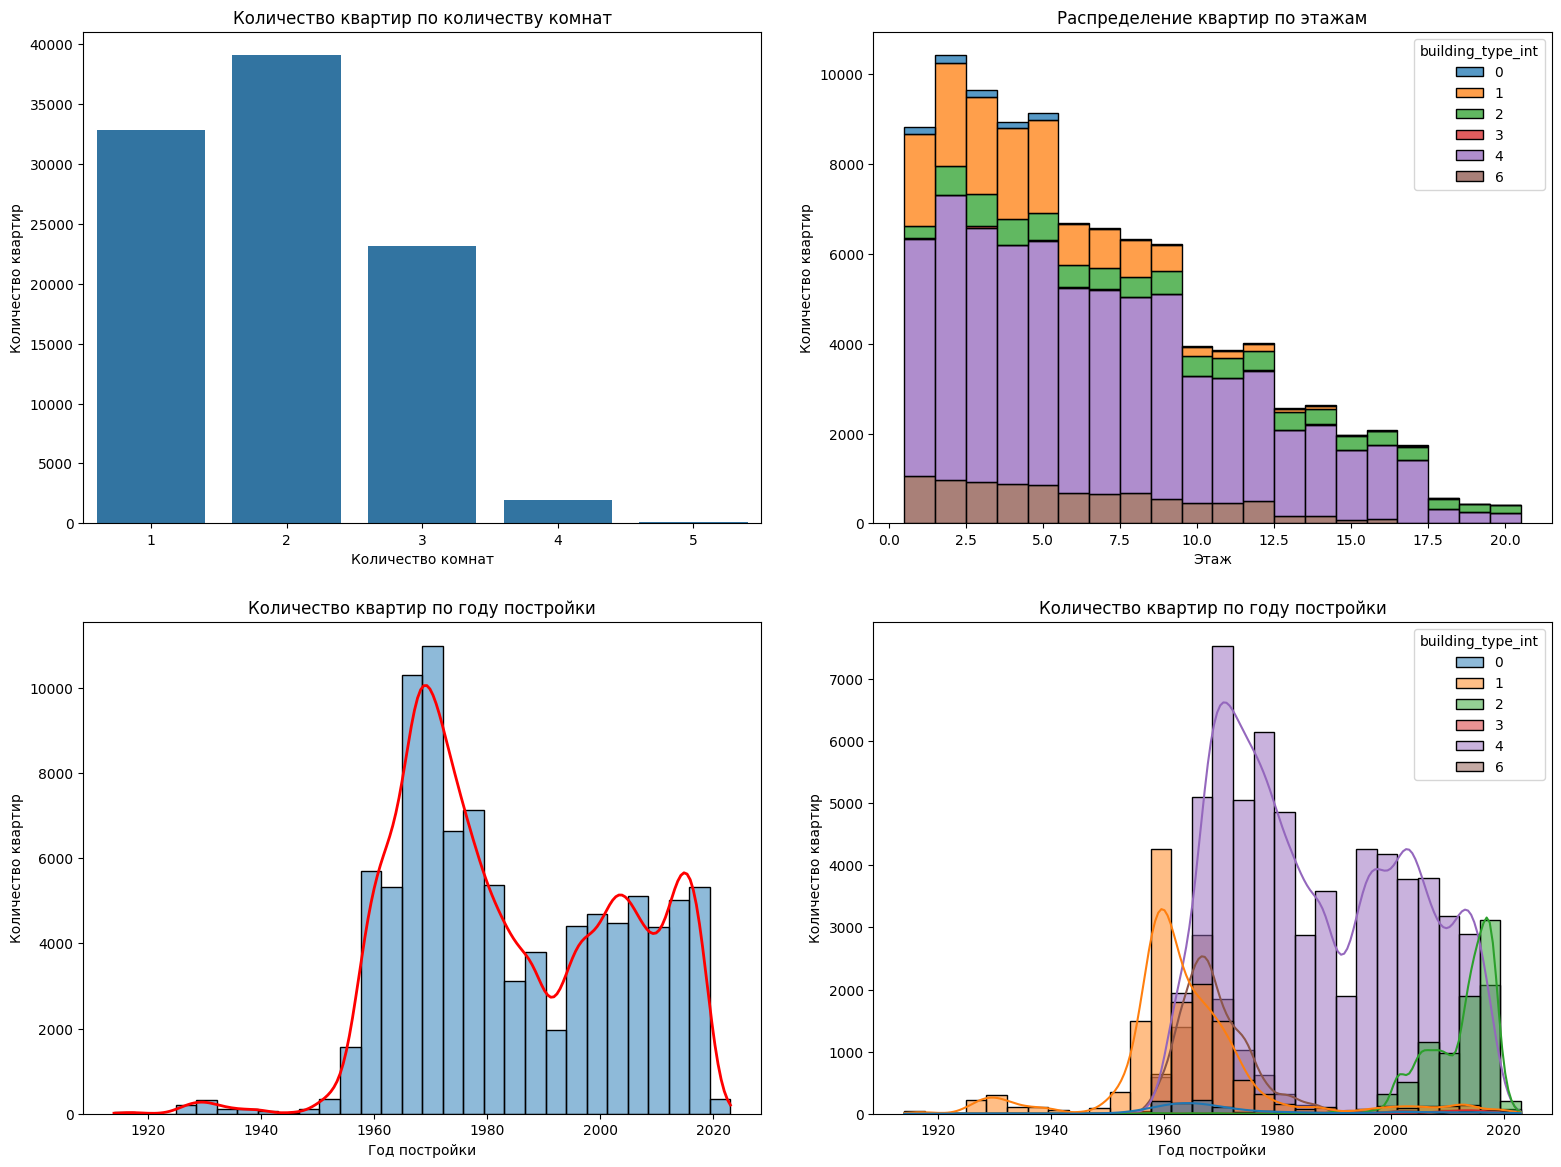

In [20]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=5)

x = 'rooms'
y = 'flat_id'
agg_df = df.groupby(x)[y].count().reset_index(name='count')
sns.barplot(data=agg_df, x=x, y='count', ax=axs[0, 0])
axs[0, 0].set_title('Количество квартир по количеству комнат')
axs[0, 0].set_xlabel('Количество комнат')
axs[0, 0].set_ylabel('Количество квартир')

x = 'floor'
sns.histplot(
    data=df, 
    x=x, 
    hue='building_type_int', 
    multiple='stack', 
    discrete=True,
    palette='tab10', 
    ax=axs[0, 1])
axs[0, 1].set_title('Распределение квартир по этажам')
axs[0, 1].set_xlabel('Этаж')
axs[0, 1].set_ylabel('Количество квартир')

x = 'build_year'
sns.histplot(
    data=df,
    x=x,
    bins=30,
    kde=True,
    fill=True,
    ax=axs[1, 0]
)
axs[1, 0].lines[0].set_color('red')
axs[1, 0].lines[0].set_linewidth(2)
axs[1, 0].set_title('Количество квартир по году постройки')
axs[1, 0].set_xlabel('Год постройки')
axs[1, 0].set_ylabel('Количество квартир')

x = 'build_year'
sns.histplot(
    data=df,
    x=x,
    bins=30,
    kde=True,
    hue='building_type_int',
    palette='tab10',
    fill=True,
    ax=axs[1, 1]
)
axs[1, 1].set_title('Количество квартир по году постройки')
axs[1, 1].set_xlabel('Год постройки')
axs[1, 1].set_ylabel('Количество квартир')

plt.savefig(ASSETS_DIR + '/flats_distribution_1.png')

plt.show()

In [7]:
building_types = sorted(df['building_type_int'].unique())

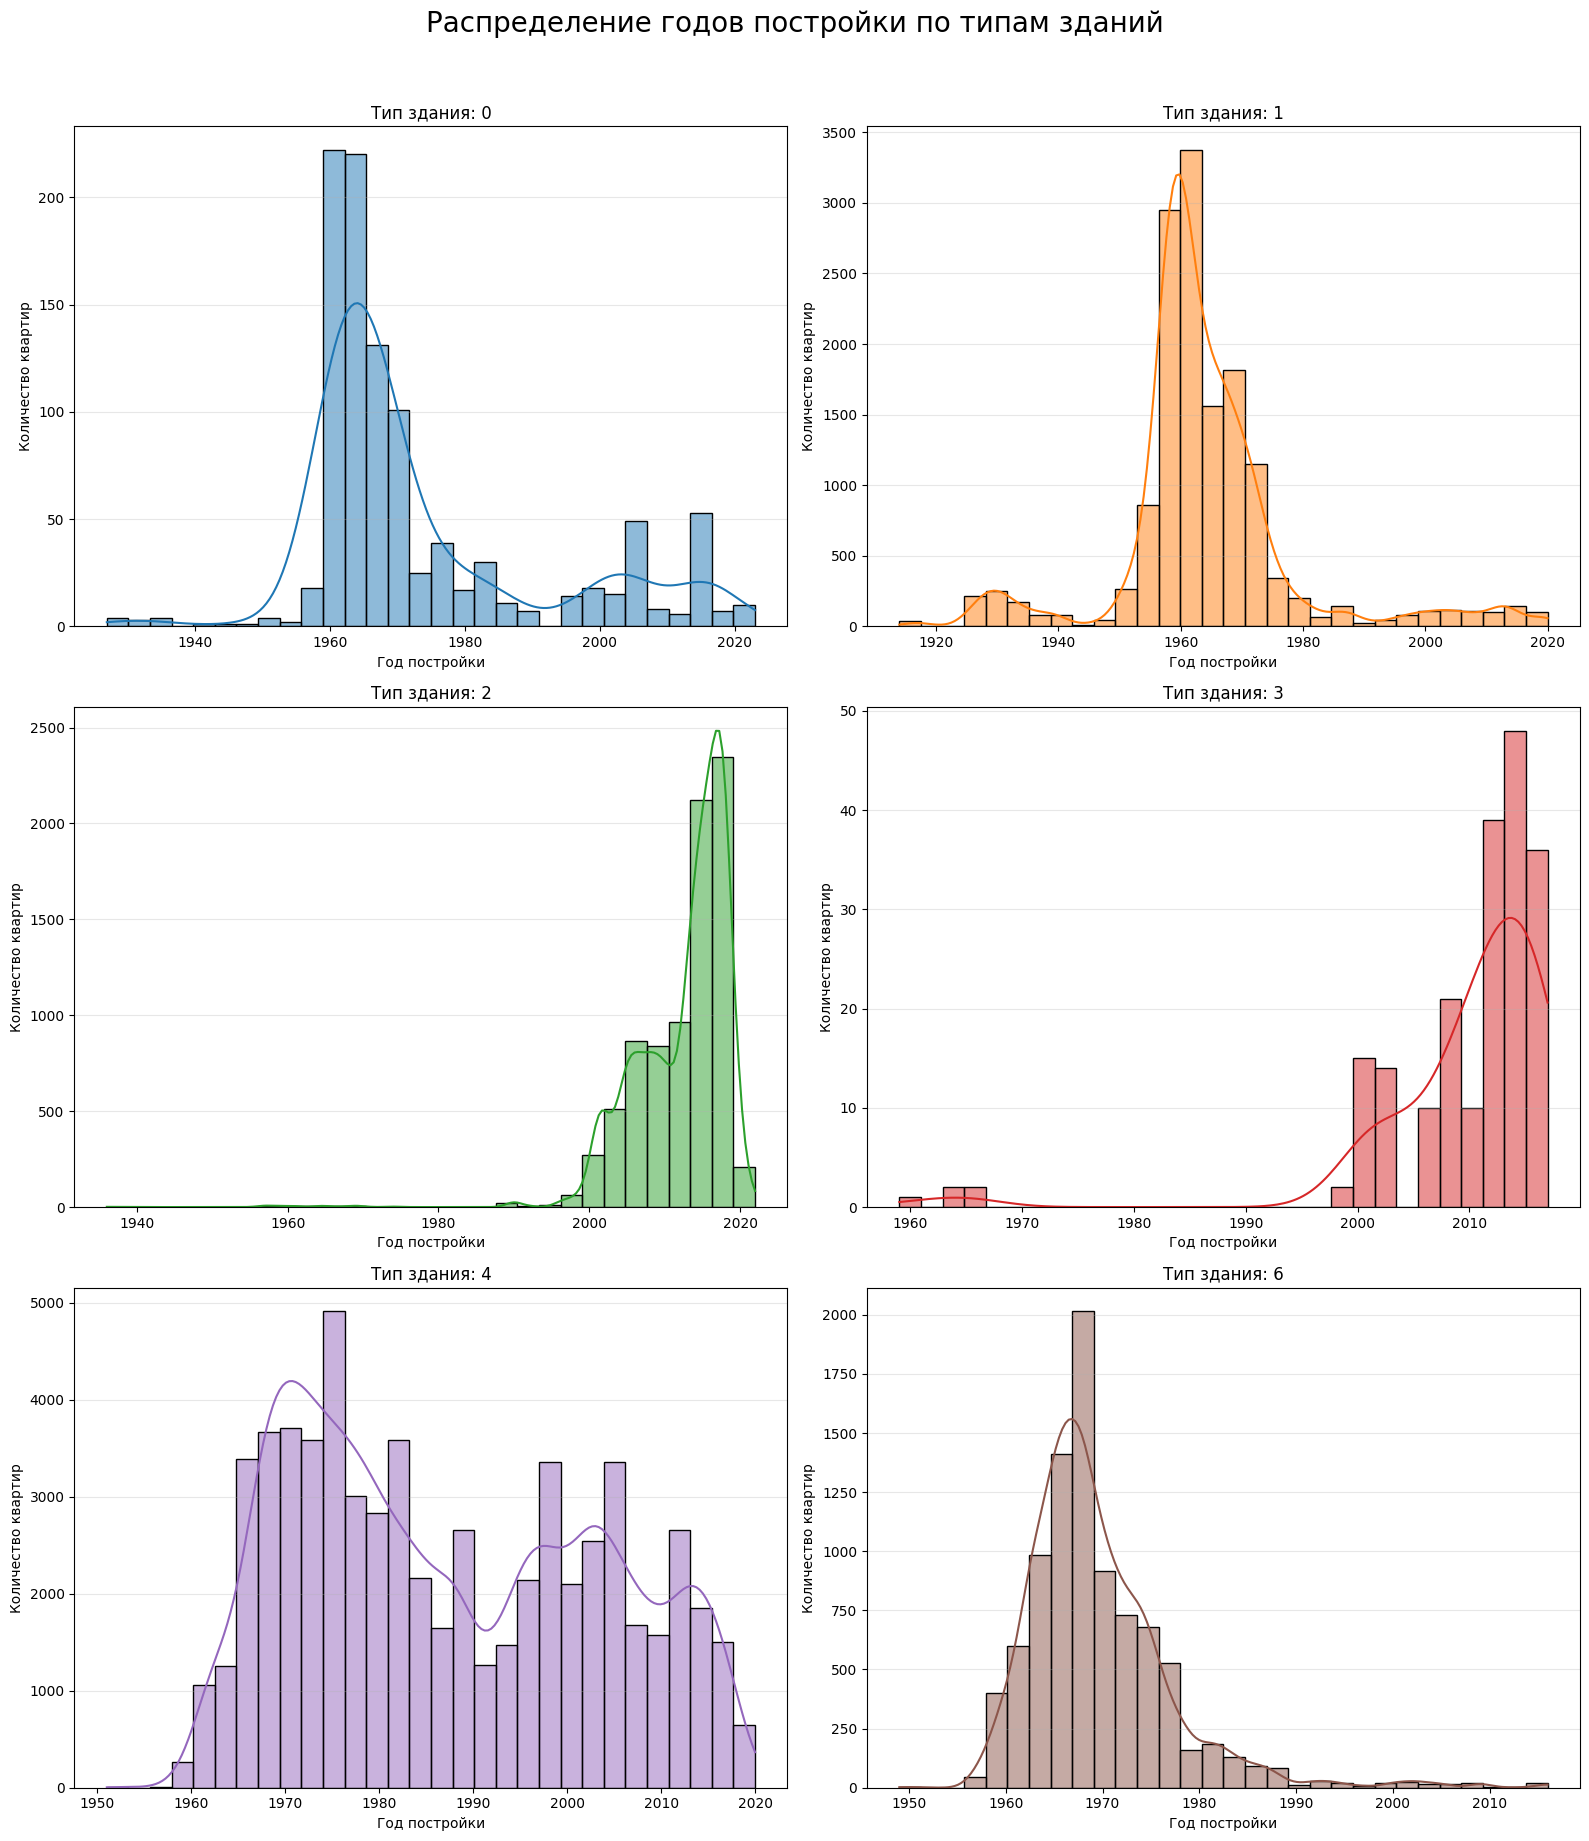

In [ ]:

x_col = 'build_year'

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
axs = axs.flatten()

palette = sns.color_palette('tab10', n_colors=len(building_types))

for i, b_type in enumerate(building_types):
    subset = df[df['building_type_int'] == b_type]
    
    sns.histplot(
        data=subset,
        x=x_col,
        bins=30,
        kde=True,
        color=palette[i],
        fill=True,
        ax=axs[i]
    )
    
    axs[i].set_title(f'Тип здания: {b_type}')
    axs[i].set_xlabel('Год постройки')
    axs[i].set_ylabel('Количество квартир')
    axs[i].grid(axis='y', alpha=0.3)

fig.suptitle('Распределение годов постройки по типам зданий', fontsize=20, y=1.02)
plt.tight_layout()
plt.savefig(ASSETS_DIR + '/build_year_by_building_type.png')
plt.show()

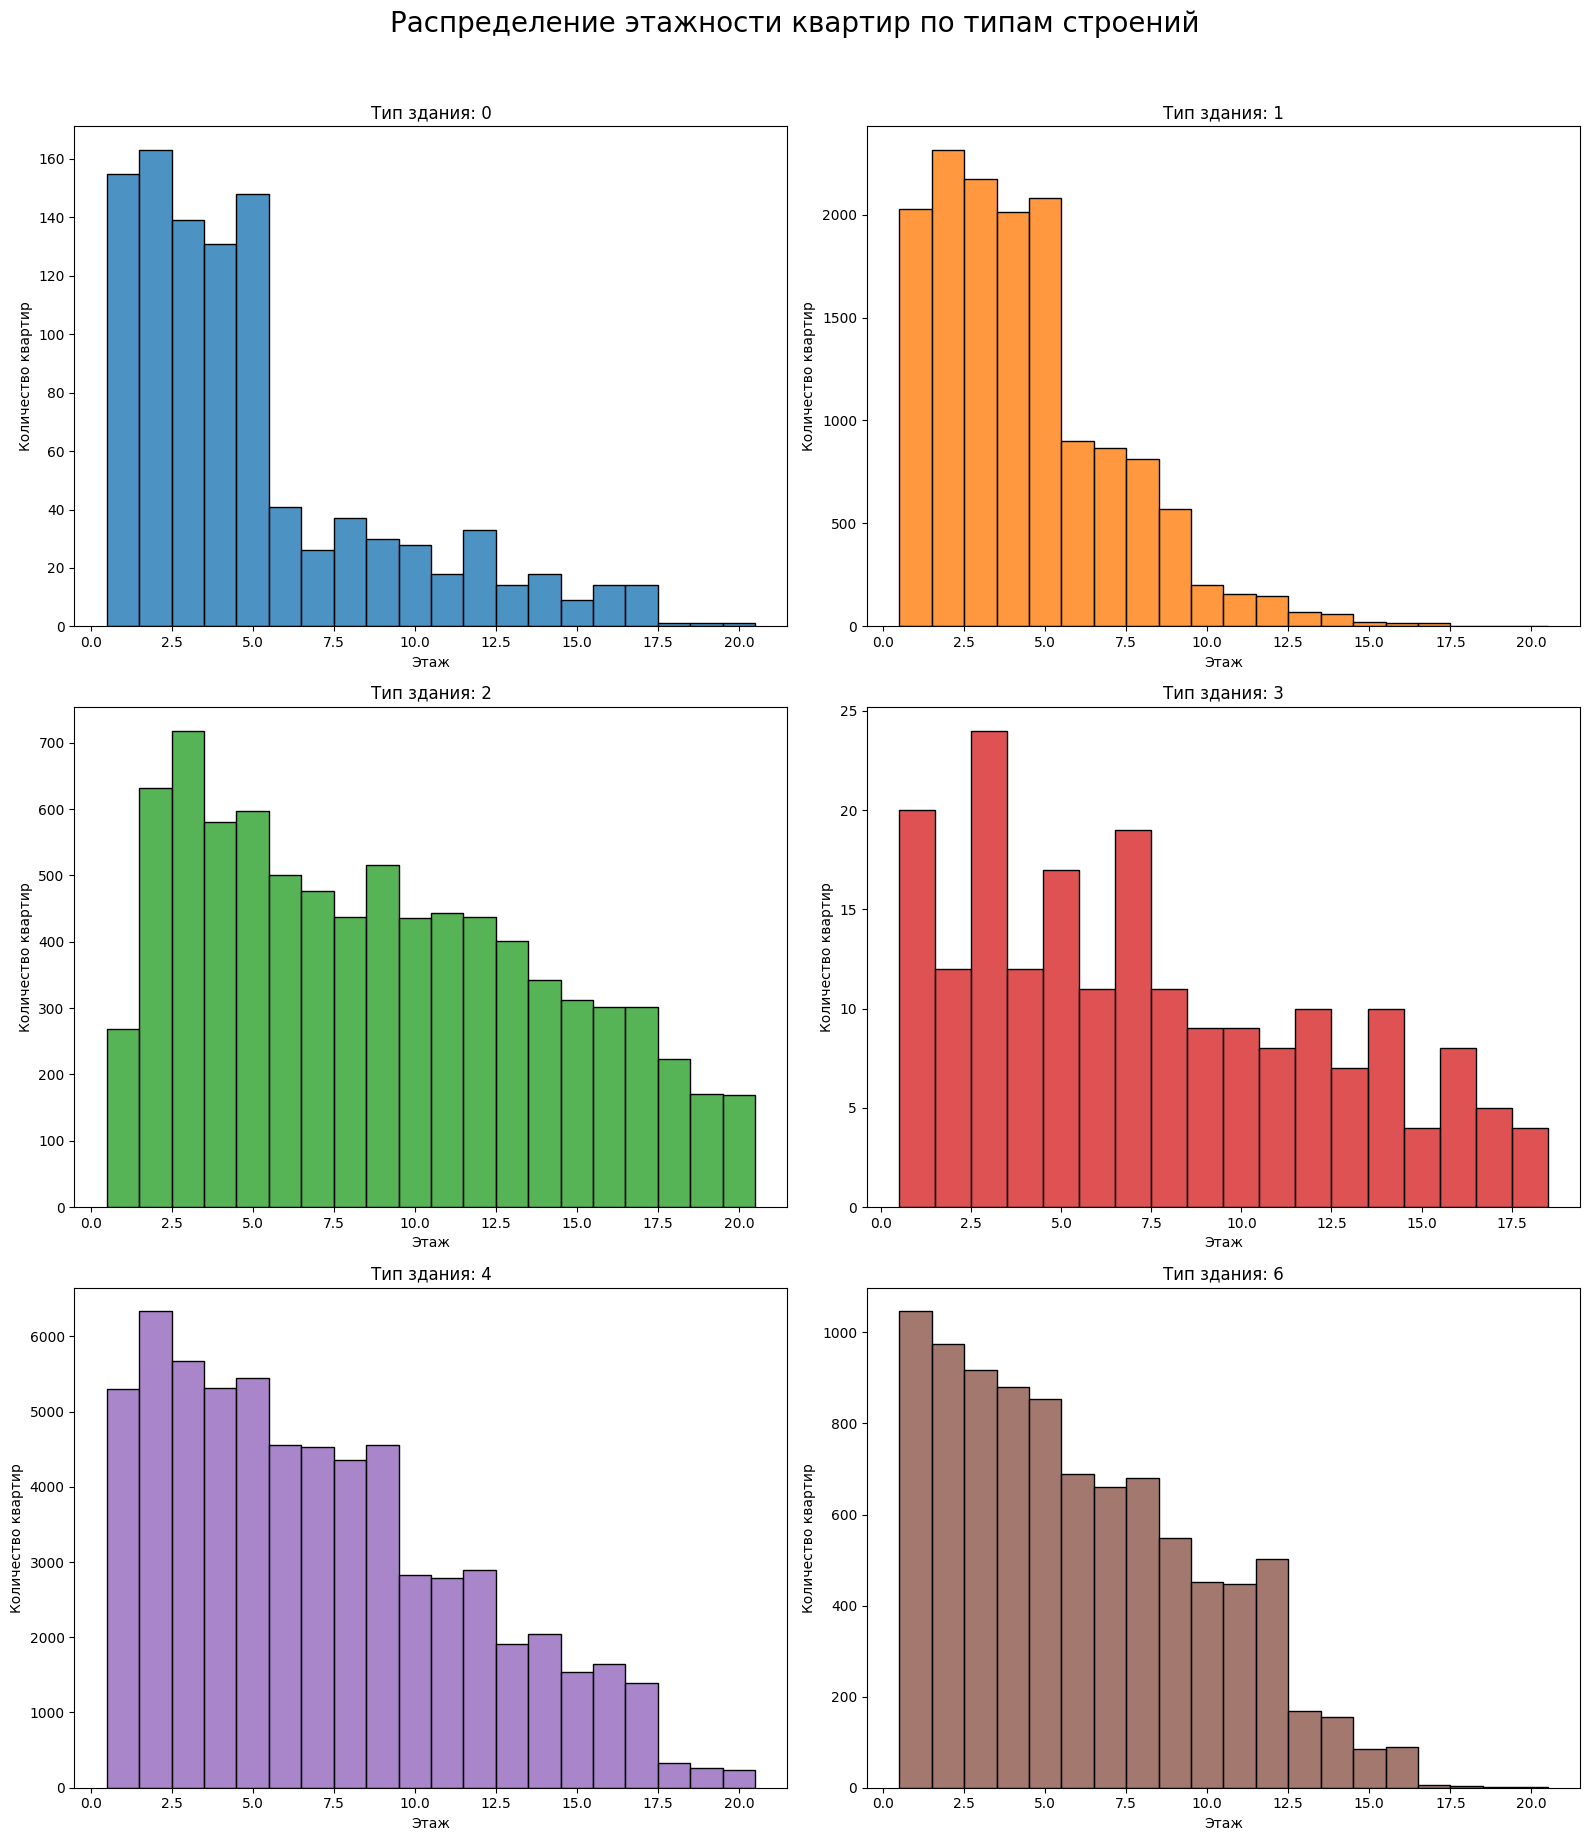

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
axs = axs.flatten()

palette = sns.color_palette('tab10', n_colors=len(building_types))

for i, b_type in enumerate(building_types):
    subset = df[df['building_type_int'] == b_type]
    
    sns.histplot(
        data=subset, 
        x='floor', 
        discrete=True,
        color=palette[i], 
        alpha=0.8,
        ax=axs[i]
    )
    
    axs[i].set_title(f'Тип здания: {b_type}')
    axs[i].set_xlabel('Этаж')
    axs[i].set_ylabel('Количество квартир')

fig.suptitle('Распределение этажности квартир по типам строений', fontsize=20, y=1.02)
plt.tight_layout()
plt.savefig(ASSETS_DIR + '/floor_distribution_by_building_type.png')
plt.show()

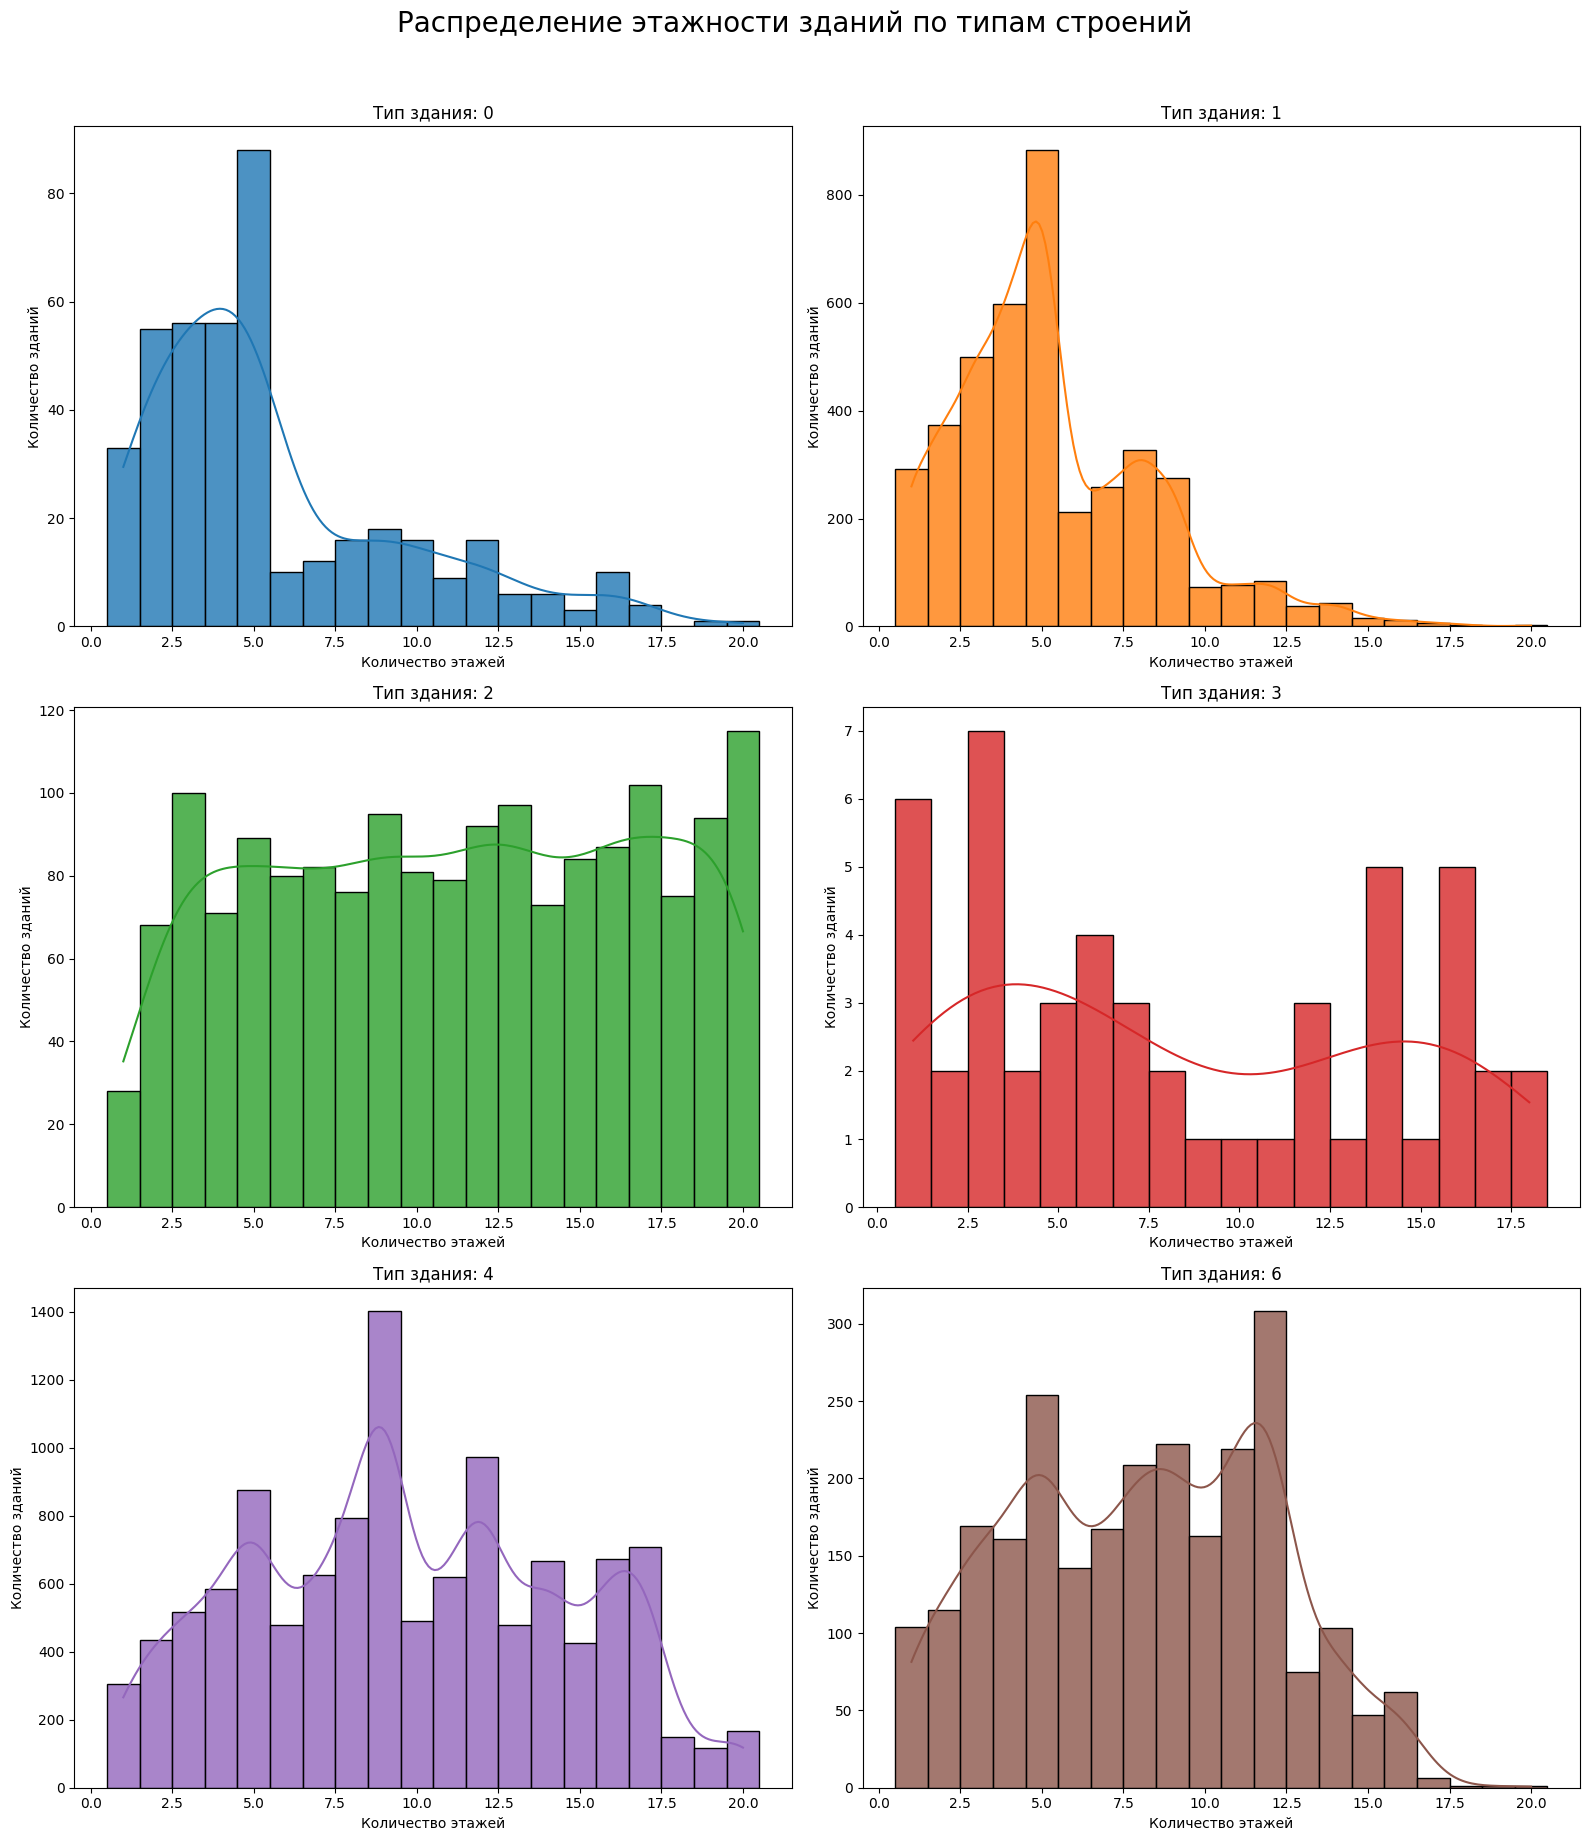

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
axs = axs.flatten()

palette = sns.color_palette('tab10', n_colors=len(building_types))

for i, b_type in enumerate(building_types):
    btype_heights = pd.DataFrame(df[df['building_type_int'] == b_type].groupby('building_id')['floor'].max())
    
    sns.histplot(
        data=btype_heights, 
        x='floor', 
        discrete=True,
        color=palette[i], 
        alpha=0.8,
        kde=True,
        ax=axs[i]
    )
    
    axs[i].set_title(f'Тип здания: {b_type}')
    axs[i].set_xlabel('Количество этажей')
    axs[i].set_ylabel('Количество зданий')

fig.suptitle('Распределение этажности зданий по типам строений', fontsize=20, y=1.02)
plt.tight_layout()
plt.savefig(ASSETS_DIR + '/building_height_distribution_by_building_type.png')
plt.show()

Основную массу квартир составляют одно и двух комнатные, в то время как четырех и пяти комнатные составляют не более 3% от общего датасета.

График годов постройки визуально можно разделить на три группы: дома довоенного периода, послевоенного советского периода и периода современной России. На основе этого можно будет выделить новый категориальный признак.

0, 1 и 6 классы представляют собой дома, построенные в основной массе в советский период. 2 класс домов стал распространятся только в современной России и к нынешнему времени уже обошел по объему 4 класс домов, который в свою очередь с 1960 года строятся и по сей день, но теряют свою популярность у застройщиков.
3 класс домов сильно малочисленный и возымел тенденцию к росту только в современной России. 

Все классы домов имеют имеют этажность до 20, за исключением только 1 класса с максимальным этажом 17.

0 и 1 класс это в основном пятиэтажные дома, скорее всего кирпичные сталинки, хотя тоже в некоторых случаях имеют высокую этажность. 
4 класс это определенно панельные дома, которые строились как в советское время, так и по сей день.

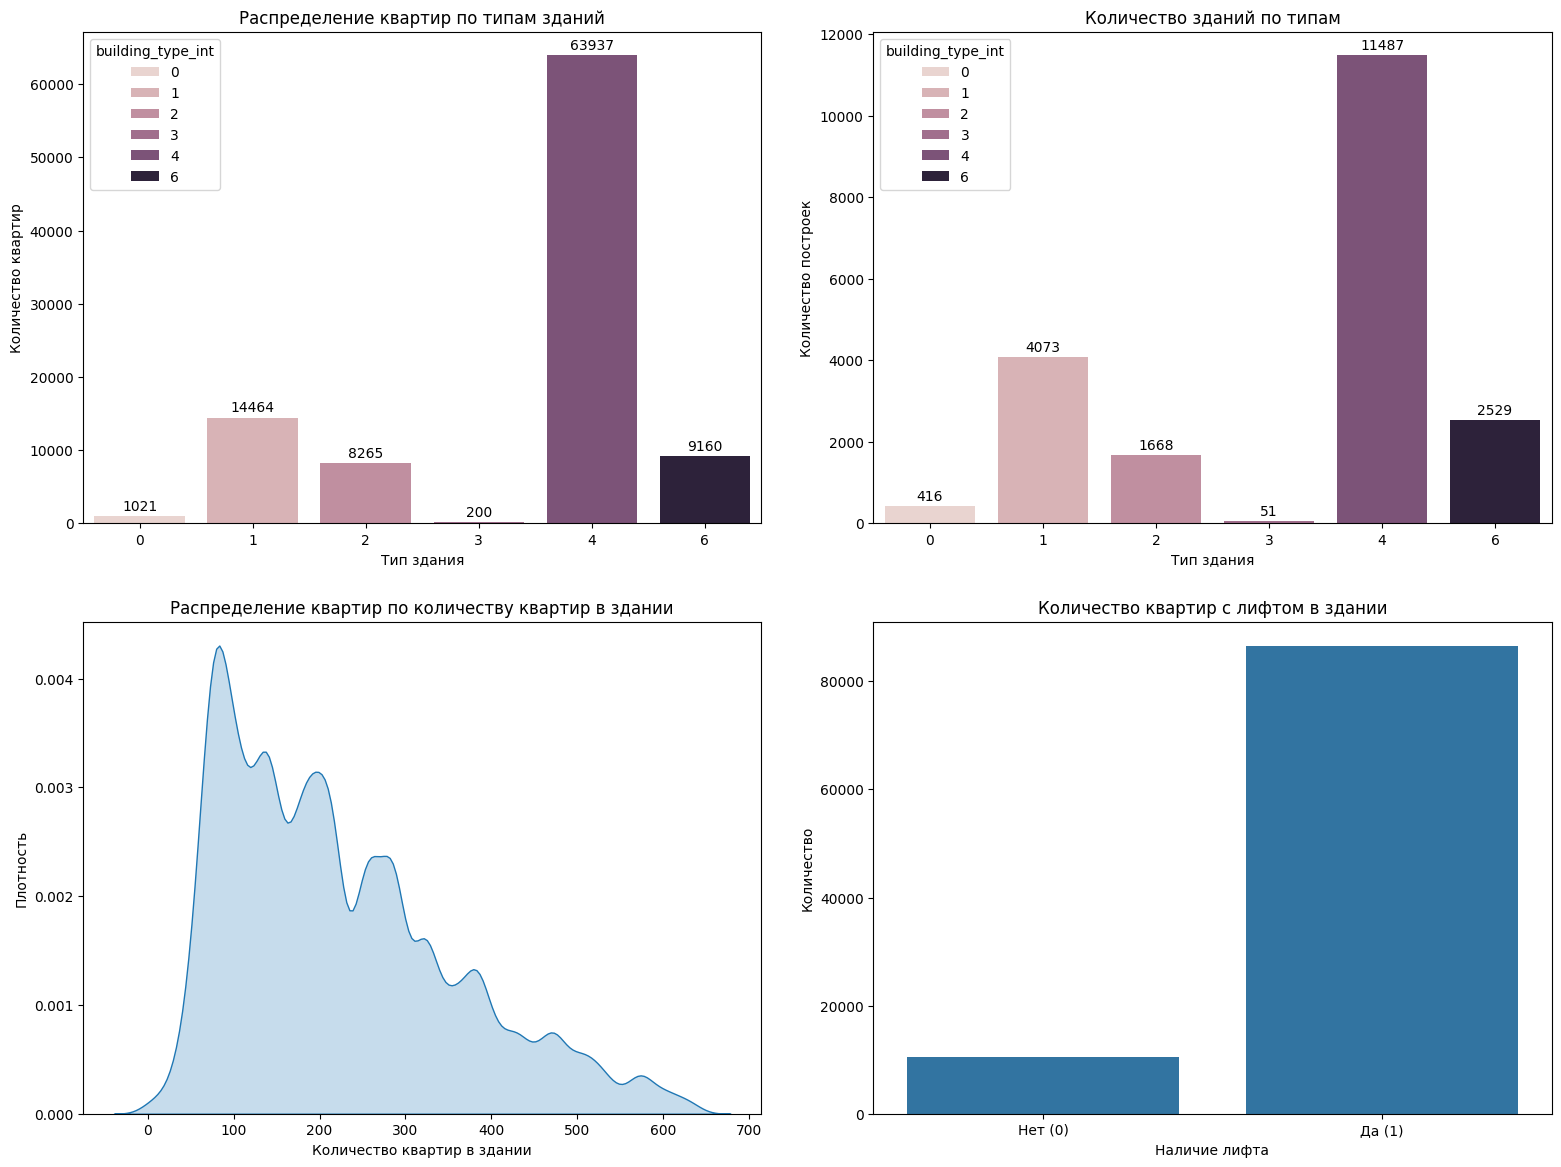

In [17]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=5)

x = 'building_type_int'
y = 'flat_id'
agg_df = df.groupby(x)[y].count().reset_index(name='count')
sns.barplot(data=agg_df, x=x, y='count', hue=x, ax=axs[0, 0])
axs[0, 0].set_title('Распределение квартир по типам зданий')
axs[0, 0].set_xlabel('Тип здания')
axs[0, 0].set_ylabel('Количество квартир')

for container in axs[0, 0].containers:
    axs[0, 0].bar_label(
        container, 
        fmt='%.0f',
        label_type='edge',
        padding=2
    )

x = 'building_type_int'
y = 'building_id'
agg_df = df.groupby(x)[y].nunique().reset_index(name='count')
sns.barplot(data=agg_df, x=x, y='count', hue=x, ax=axs[0, 1])
axs[0, 1].set_title('Количество зданий по типам')
axs[0, 1].set_xlabel('Тип здания')
axs[0, 1].set_ylabel('Количество построек')

for container in axs[0, 1].containers:
    axs[0, 1].bar_label(
        container, 
        fmt='%.0f',
        label_type='edge',
        padding=2
    )

x = 'flats_count'
y = 'flat_id'
sns.kdeplot(
    data=df, 
    x=x, 
    ax=axs[1, 0],
    fill=True
)
axs[1, 0].set_title('Распределение квартир по количеству квартир в здании')
axs[1, 0].set_xlabel('Количество квартир в здании')
axs[1, 0].set_ylabel('Плотность')

sns.countplot(data=df, x='has_elevator', ax=axs[1, 1])

axs[1, 1].set_title('Количество квартир с лифтом в здании')
axs[1, 1].set_xlabel('Наличие лифта')
axs[1, 1].set_ylabel('Количество')
axs[1, 1].set_xticks([0, 1])
axs[1, 1].set_xticklabels(['Нет (0)', 'Да (1)'])

plt.savefig(ASSETS_DIR + '/flats_distribution_2.png')

plt.show()

In [ ]:
elevator_check = df.groupby('building_type_int')['has_elevator'].max()

types_with_elevator = elevator_check[elevator_check == 1].index.tolist()

print(f"Типы зданий с лифтами: {types_with_elevator}")

Типы зданий с лифтами: [0, 1, 2, 3, 4, 6]


In [22]:
elevator_stats = df.groupby('building_type_int')['has_elevator'].min()

always_has_elevator = elevator_stats[elevator_stats == 1].index.tolist()

print(f"Типы зданий, где лифт есть всегда: {always_has_elevator}")

Типы зданий, где лифт есть всегда: []


В зданиях каждого типа встречаются как и лифты, так и их отсутствие, так что наличие лифта не зависит от типа здания.

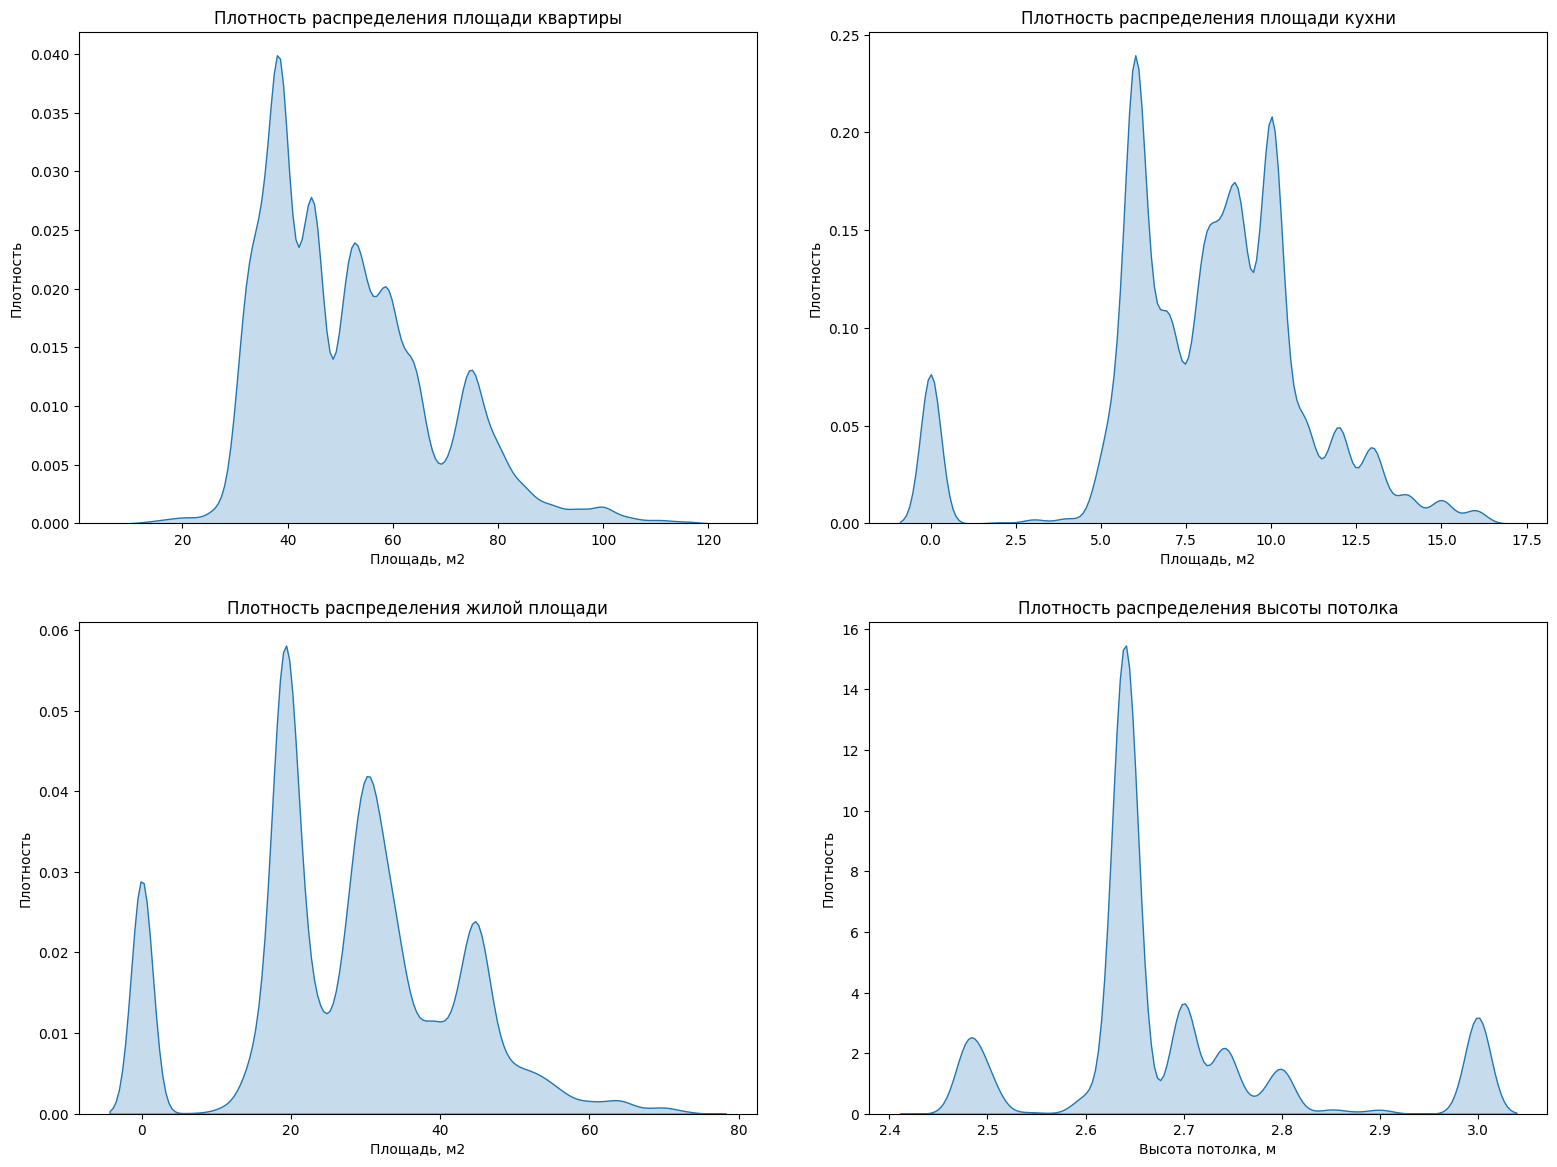

In [33]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=5)

sns.kdeplot(
    data=df,
    x='total_area',
    ax=axs[0, 0],
    fill=True
)
axs[0, 0].set_title('Плотность распределения площади квартиры')
axs[0, 0].set_xlabel('Площадь, м2')
axs[0, 0].set_ylabel('Плотность')

sns.kdeplot(
    data=df,
    x='kitchen_area',
    ax=axs[0, 1],
    fill=True
)
axs[0, 1].set_title('Плотность распределения площади кухни')
axs[0, 1].set_xlabel('Площадь, м2')
axs[0, 1].set_ylabel('Плотность')

sns.kdeplot(
    data=df,
    x='living_area',
    ax=axs[1, 0],
    fill=True
)
axs[1, 0].set_title('Плотность распределения жилой площади')
axs[1, 0].set_xlabel('Площадь, м2')
axs[1, 0].set_ylabel('Плотность')

sns.kdeplot(
    data=df,
    x='ceiling_height',
    ax=axs[1, 1],
    fill=True
)
axs[1, 1].set_title('Плотность распределения высоты потолка')
axs[1, 1].set_xlabel('Высота потолка, м')
axs[1, 1].set_ylabel('Плотность')

plt.savefig(ASSETS_DIR + '/flats_area_distribution.png')

plt.show()

Из графика выше можно сделать вывод, что есть квартиры, в которых отсутствует кухня и жилая площадь (их площадь 0). Вероятно, это характеристики апартаментов, поэтому следует проверить это на квартирах, у которых `is_apartment` равен `True` и `False`

In [11]:
df[(df['is_apartment'] == 0) & (df['living_area'] == 0) & (df['kitchen_area'] == 0)].count()

flat_id              3747
building_id          3747
build_year           3747
building_type_int    3747
latitude             3747
longitude            3747
ceiling_height       3747
flats_count          3747
floors_total         3747
has_elevator         3747
floor                3747
kitchen_area         3747
living_area          3747
rooms                3747
is_apartment         3747
studio               3747
total_area           3747
price                3747
dtype: int64

In [12]:
zeros_mask = (df['living_area'] == 0) & (df['kitchen_area'] == 0)
print(df[zeros_mask]['total_area'].describe())

count    3837.000000
mean       52.205048
std        18.529638
min        11.000000
25%        38.000000
50%        50.000000
75%        63.700001
max       118.199997
Name: total_area, dtype: float64


В датасете 3747 квартир с нулевой жилой площадью и площадью кухни, которые при этом не помечены как апартаменты. Скорее всего эти квартиры являются студиями и в документах БТИ написана только общая площадь, а у `kitchen_area` и `living_area` стоят нули. В датасете у всех записей параметр `studio` помечен как `False`, и, вероятно, данные квартиры не были помечены как студии. А поскольку они не помечены как апартаменты и являются жилыми, сделаем предположение, что это именно студии.

In [22]:
df['studio'] = ((df['living_area'] == 0) & (df['kitchen_area'] == 0)).astype(int)

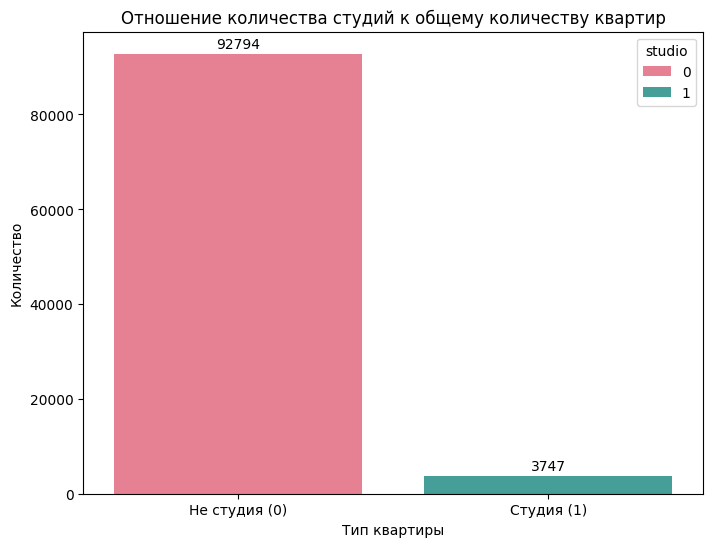

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

sns.countplot(
    data=df[df['is_apartment'] == 0],
    x='studio',
    ax=axs,
    hue='studio',
    palette='husl'
)

for container in axs.containers:
    axs.bar_label(
        container, 
        fmt='%.0f',
        label_type='edge',
        padding=2
    )

axs.set_title('Отношение количества студий к общему количеству квартир')
axs.set_xlabel('Тип квартиры')
axs.set_ylabel('Количество')

axs.set_xticks([0, 1])
axs.set_xticklabels(['Не студия (0)', 'Студия (1)'])

plt.savefig(ASSETS_DIR + '/studio_distribution.png')
plt.show()

После маркировки студий их доля от общего количества все равно довольно низка. По данным исследования «Циан.Аналитики» за 2024 год, в среднем каждая шестая квартира в новостройках РФ относится к категории «студия». При этом если в недавно построенных домах доля таких квартир составляет 13%, то в строящихся — 16%. Проверим это на нашем датасете.

In [23]:
share = (df['build_year'] > 2000).mean()
print(f"Доля новостроек от общей выборки: {share:.2%}")
print(f"Из них по статистике только {share*0.13:.2%} квартир от общей выборки являются студиями")

studio_rate = (df['studio'] == 1).mean()
print(f"После маркировки доля студий составляет {studio_rate:.2%} от общего количества")

Доля новостроек от общей выборки: 26.85%
Из них по статистике только 3.49% квартир от общей выборки являются студиями
После маркировки доля студий составляет 3.95% от общего количества


Статистически доли сходятся, так что можно принять, что студии помечены верно

/tmp/ipykernel_298826/3575127530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


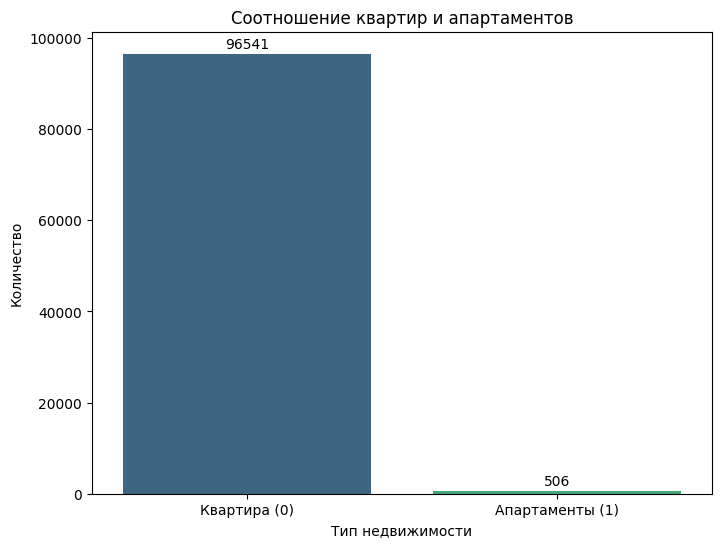

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

sns.countplot(
    data=df,
    x='is_apartment',
    ax=axs,
    palette='viridis'
)

for container in axs.containers:
    axs.bar_label(
        container, 
        fmt='%.0f',
        label_type='edge',
        padding=2
    )

axs.set_title('Соотношение квартир и апартаментов')
axs.set_xlabel('Тип недвижимости')
axs.set_ylabel('Количество')

axs.set_xticks([0, 1])
axs.set_xticklabels(['Квартира (0)', 'Апартаменты (1)'])

plt.savefig(ASSETS_DIR + '/apartments_distribution.png')
plt.show()

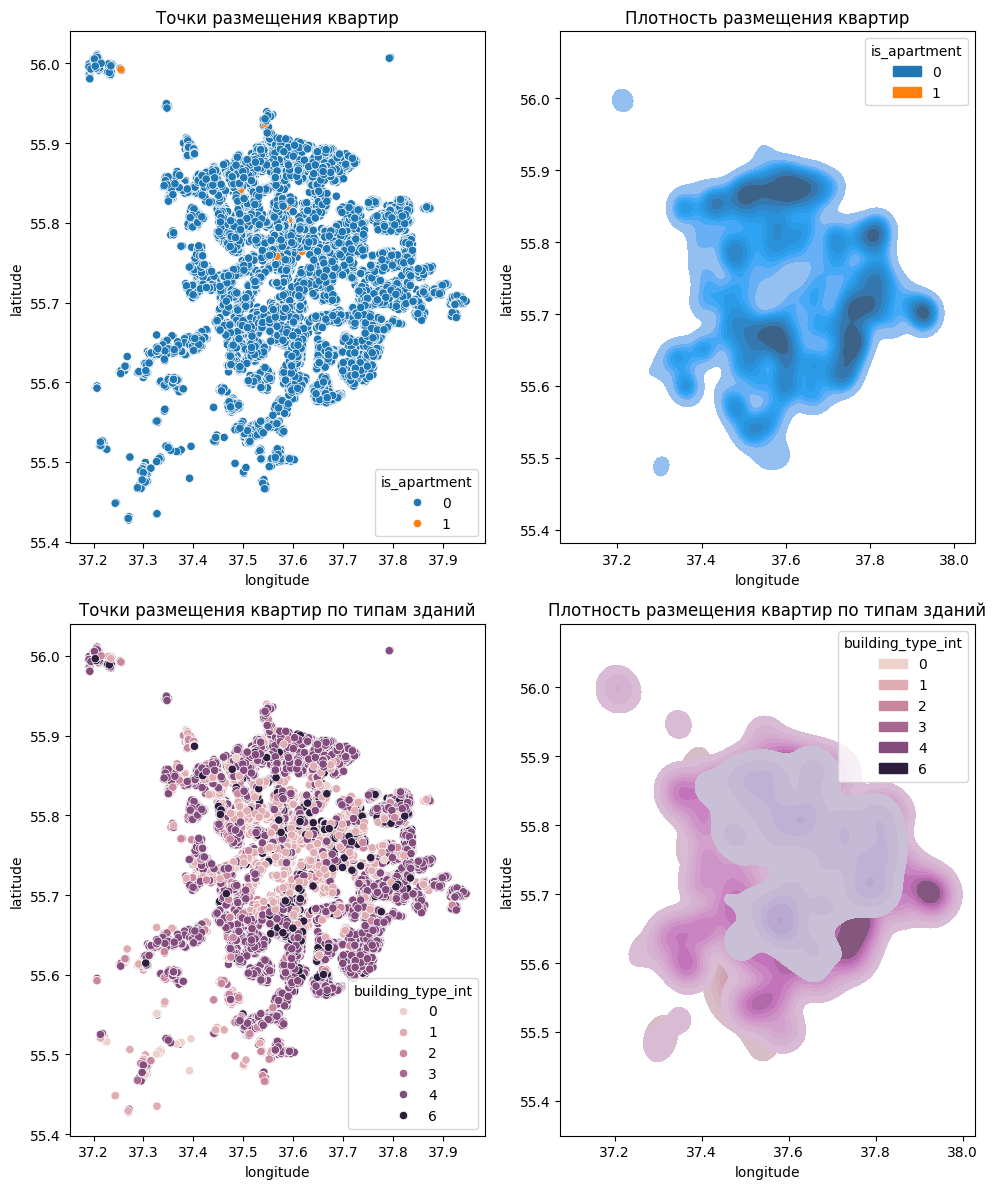

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(10, 12))

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude", 
    hue='is_apartment', 
    ax=axs[0, 0]
)
axs[0, 0].set_title("Точки размещения квартир")

sns.kdeplot(
    data=df, 
    x="longitude", 
    y="latitude",
    hue='is_apartment',
    fill=True, 
    ax=axs[0, 1]
)
axs[0, 1].set_title("Плотность размещения квартир")

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude", 
    hue='building_type_int', 
    ax=axs[1, 0]
)
axs[1, 0].set_title("Точки размещения квартир по типам зданий")

sns.kdeplot(
    data=df, 
    x="longitude", 
    y="latitude",
    hue='building_type_int',
    fill=True, 
    ax=axs[1, 1]
)
axs[1, 1].set_title("Плотность размещения квартир по типам зданий")

plt.tight_layout()
plt.savefig(ASSETS_DIR + "/flats_location_kde.png")
plt.show()

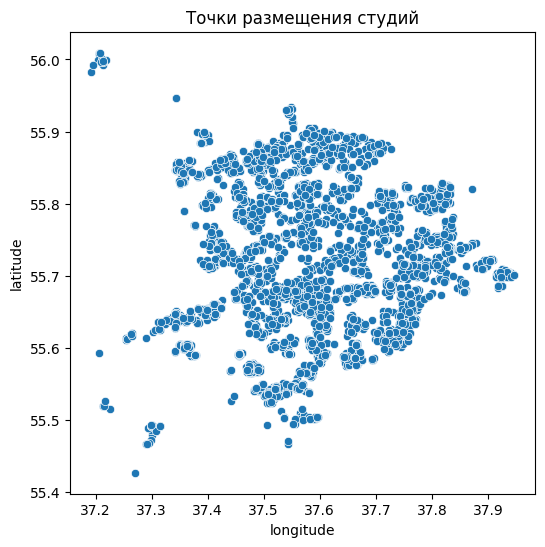

In [31]:
plt.figure(figsize=(6, 6))

sns.scatterplot(
    data=df[df['studio'] == 1], 
    x="longitude", 
    y="latitude"
)
plt.title("Точки размещения студий")
plt.savefig(ASSETS_DIR + "studio_map.png")
plt.show()

In [32]:
import numpy as np

center_lat = 55.75370903771494
center_lon = 37.61981338262558

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371

    phi1, phi2 = np.radians(lat1), np.radians(lat2) 
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    # Формула Гаверсинуса
    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

df['distance_to_center'] = calculate_distance(
    df['latitude'], 
    df['longitude'], 
    center_lat, 
    center_lon
)

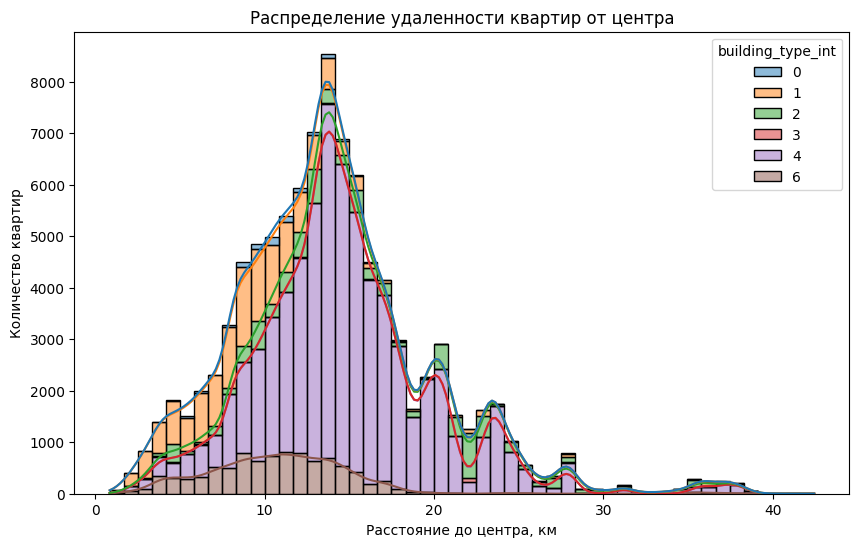

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=df,
    x='distance_to_center',
    kde=True,
    hue='building_type_int',
    multiple='stack',
    bins=50,
    color='teal',
    palette='tab10',
    ax=ax
)

ax.set_title('Распределение удаленности квартир от центра')
ax.set_xlabel('Расстояние до центра, км')
ax.set_ylabel('Количество квартир')

plt.savefig(ASSETS_DIR + '/distance_to_center.png')

plt.show()

### 2.4 Анализ целевой переменной

In [33]:
target = 'price'

In [72]:
df[target].describe()

count    9.704700e+04
mean     1.178503e+07
std      4.449464e+06
min      6.000000e+05
25%      8.500000e+06
50%      1.080000e+07
75%      1.400000e+07
max      2.840000e+07
Name: price, dtype: float64

In [34]:
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return f'{int(x / 1_000_000)}'

/tmp/ipykernel_298826/2601241712.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(x / 1_000_000) for x in current_values])


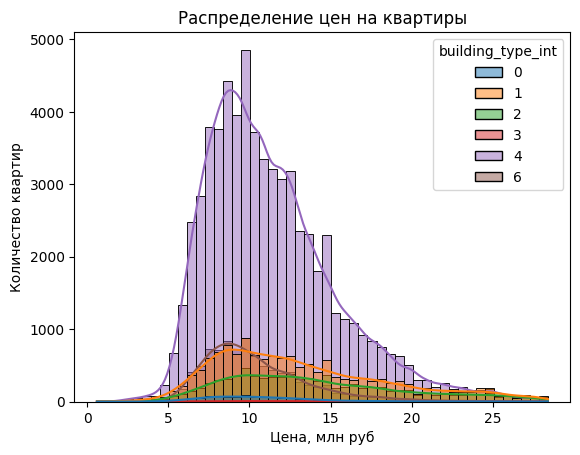

In [ ]:
sns.histplot(
    data=df,
    x=target, 
    bins=50,
    kde=True,
    hue='building_type_int',
    palette='tab10'
)
plt.title(f"Распределение цен на квартиры")
plt.xlabel('Цена, млн руб')
plt.ylabel('Количество квартир')

current_values = plt.gca().get_xticks()
plt.gca().xaxis.set_major_formatter(million_formatter)

plt.savefig(ASSETS_DIR + '/price_distribution.png')

plt.show()

### 2.4 Анализ целевой переменной в зависимости от различных признаков

In [36]:
df_filtered = df.copy()

step = 5
x = 'area_bin'
df_filtered[x] = (df_filtered['total_area'] // step) * step

stats = df_filtered.groupby(x)[target].agg(['mean', 'median']).reset_index()

stats_melted = stats.melt(
    id_vars='area_bin', 
    value_vars=['mean', 'median'], 
    var_name='metric', 
    value_name='price'
)

print(stats_melted.head())

   area_bin metric         price
0      10.0   mean  2.946091e+06
1      15.0   mean  4.730407e+06
2      20.0   mean  6.084483e+06
3      25.0   mean  7.655749e+06
4      30.0   mean  8.267879e+06


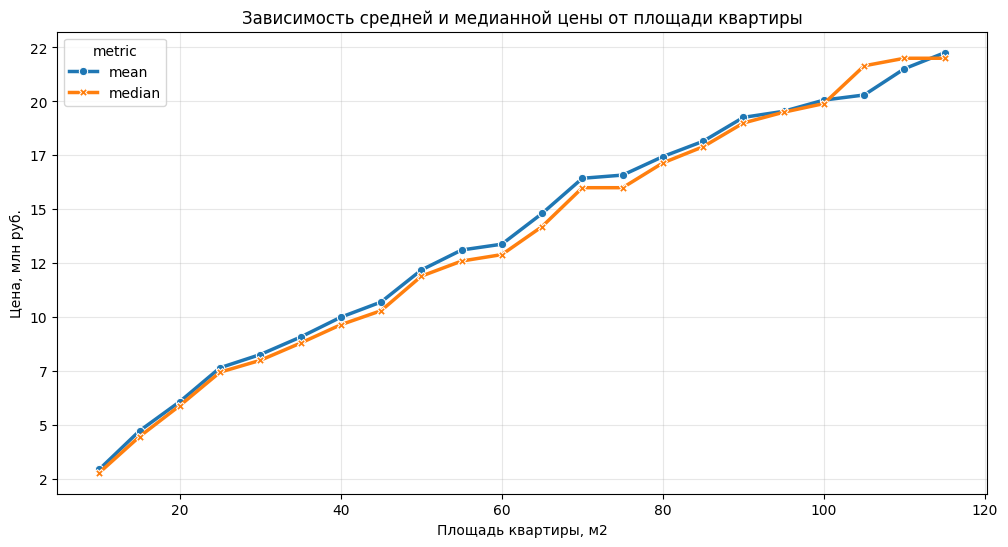

In [82]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=stats_melted,
    x='area_bin',
    y='price',
    hue='metric',
    style='metric', 
    markers=True,
    dashes=False,
    palette='tab10',
    linewidth=2.5
)

plt.title('Зависимость средней и медианной цены от площади квартиры')
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Цена, млн руб.')
plt.grid(True, alpha=0.3)

plt.gca().yaxis.set_major_formatter(million_formatter)

plt.savefig(ASSETS_DIR + '/area_price_stats.png')
plt.show()

На данном графике необычным выглядит только диапазон площадей 100-115 кв.м. На нем средняя цена становится ниже медианной, что говорит о том, что в этом диапазоне больше дешевых квартир, чем элитных.

In [66]:
df[df['total_area'] > 100]['price'].describe()

count    7.130000e+02
mean     2.066501e+07
std      4.457199e+06
min      5.800000e+06
25%      1.750000e+07
50%      2.099999e+07
75%      2.449900e+07
max      2.839000e+07
Name: price, dtype: float64

Медианная цена в данном диапазоне составляет 20,6 млн. Максимальная цена составляет 28,3 млн, что на 8 млн выше медианной. Но минимальная цена составляет 5,8 млн, что на 14 млн ниже медианной. По этой причине дешевые квартиры и перетягивают среднее в свою сторону

In [37]:
x = 'distance_to_center_bin'
step = 5
df_filtered[x] = (df_filtered['distance_to_center'] // step) * step

agg_df = df_filtered.groupby(x)[target].agg(['mean', 'std', 'median']).reset_index()

stats = agg_df.melt(
    id_vars=[x],
    value_vars=['mean', 'std', 'median'],
    var_name='metric', 
    value_name='price'
)

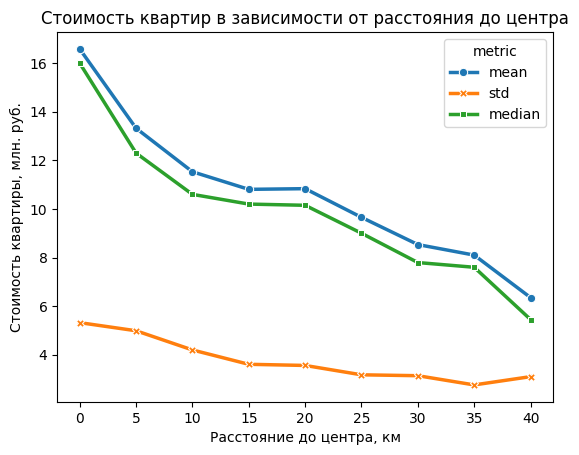

In [83]:
sns.lineplot(
    data=stats,
    x=x,
    y=target,
    hue='metric',
    style='metric', 
    markers=True,
    dashes=False,
    palette='tab10',
    linewidth=2.5
)

plt.title('Стоимость квартир в зависимости от расстояния до центра')
plt.xlabel("Расстояние до центра, км")
plt.ylabel("Стоимость квартиры, млн. руб.")

plt.gca().yaxis.set_major_formatter(million_formatter)

plt.savefig(ASSETS_DIR + '/price_and_distance_correlation.png')
plt.show()

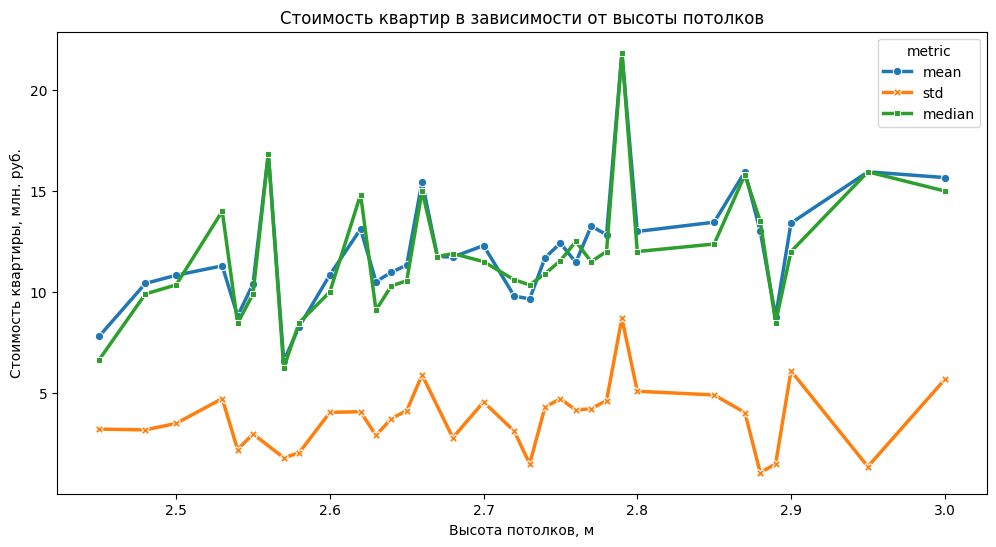

In [32]:
plt.figure(figsize=(12, 6))
x = 'ceiling_height'

agg_df = df_filtered.groupby([x])[target].agg(['mean', 'std', 'median']).reset_index()

stats = agg_df.melt(
    id_vars=[x],
    value_vars=['mean', 'std', 'median'],
    var_name='metric', 
    value_name='price'
)

sns.lineplot(
    data=stats,
    x=x,
    y=target,
    hue='metric',
    style='metric', 
    markers=True,
    dashes=False,
    palette='tab10',
    linewidth=2.5
)

plt.title('Стоимость квартир в зависимости от высоты потолков')
plt.xlabel("Высота потолков, м")
plt.ylabel("Стоимость квартиры, млн. руб.")

plt.gca().yaxis.set_major_formatter(million_formatter)

plt.savefig(ASSETS_DIR + '/price_and_ceiling_height_correlation.png')
plt.show()

В среднем самые дорогие квартиры имеют высоту потолков 2,79 м и сильно выделяются на остальном фоне. Так же в одну ценовую группу дорогих квартир можно выделить квартиры с высотой потолков 2.56, 2.95, 2.87, 3.00, 2.66, 2.62, 2.53 м.

In [34]:
stats[stats['metric'] == 'median'].sort_values(by='price', ascending=False)

,ceiling_height,metric,price
93,2.79,median,21850000.0
74,2.56,median,16850000.0
100,2.95,median,15950000.0
96,2.87,median,15800000.0
101,3.00,median,15000000.0
82,2.66,median,15000000.0
78,2.62,median,14825000.0
71,2.53,median,14000000.0
97,2.88,median,13500000.0
90,2.76,median,12500000.0


In [35]:
df['building_age'] = df['build_year'].apply(lambda x: 2025 - x)

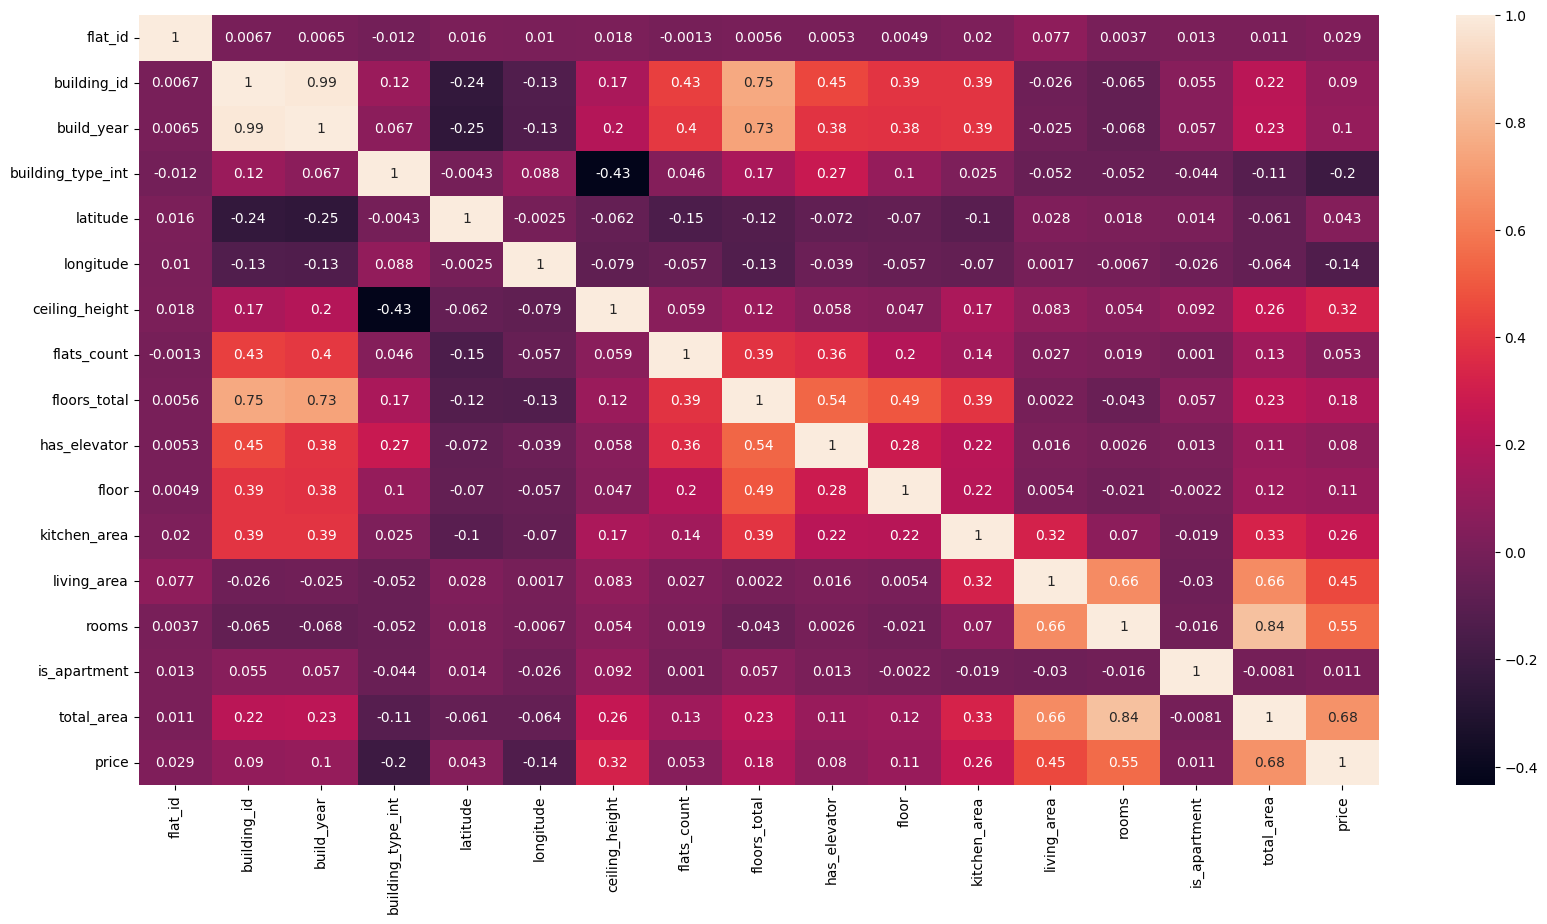

In [43]:
# Матрица корреляции признаков и их влияние на целевую переменную
plt.figure(figsize=(20, 10))
sns.heatmap(df.loc[:, df.nunique() > 1].corr(), annot=True)
plt.savefig(ASSETS_DIR + '/correlation.png')
plt.show()

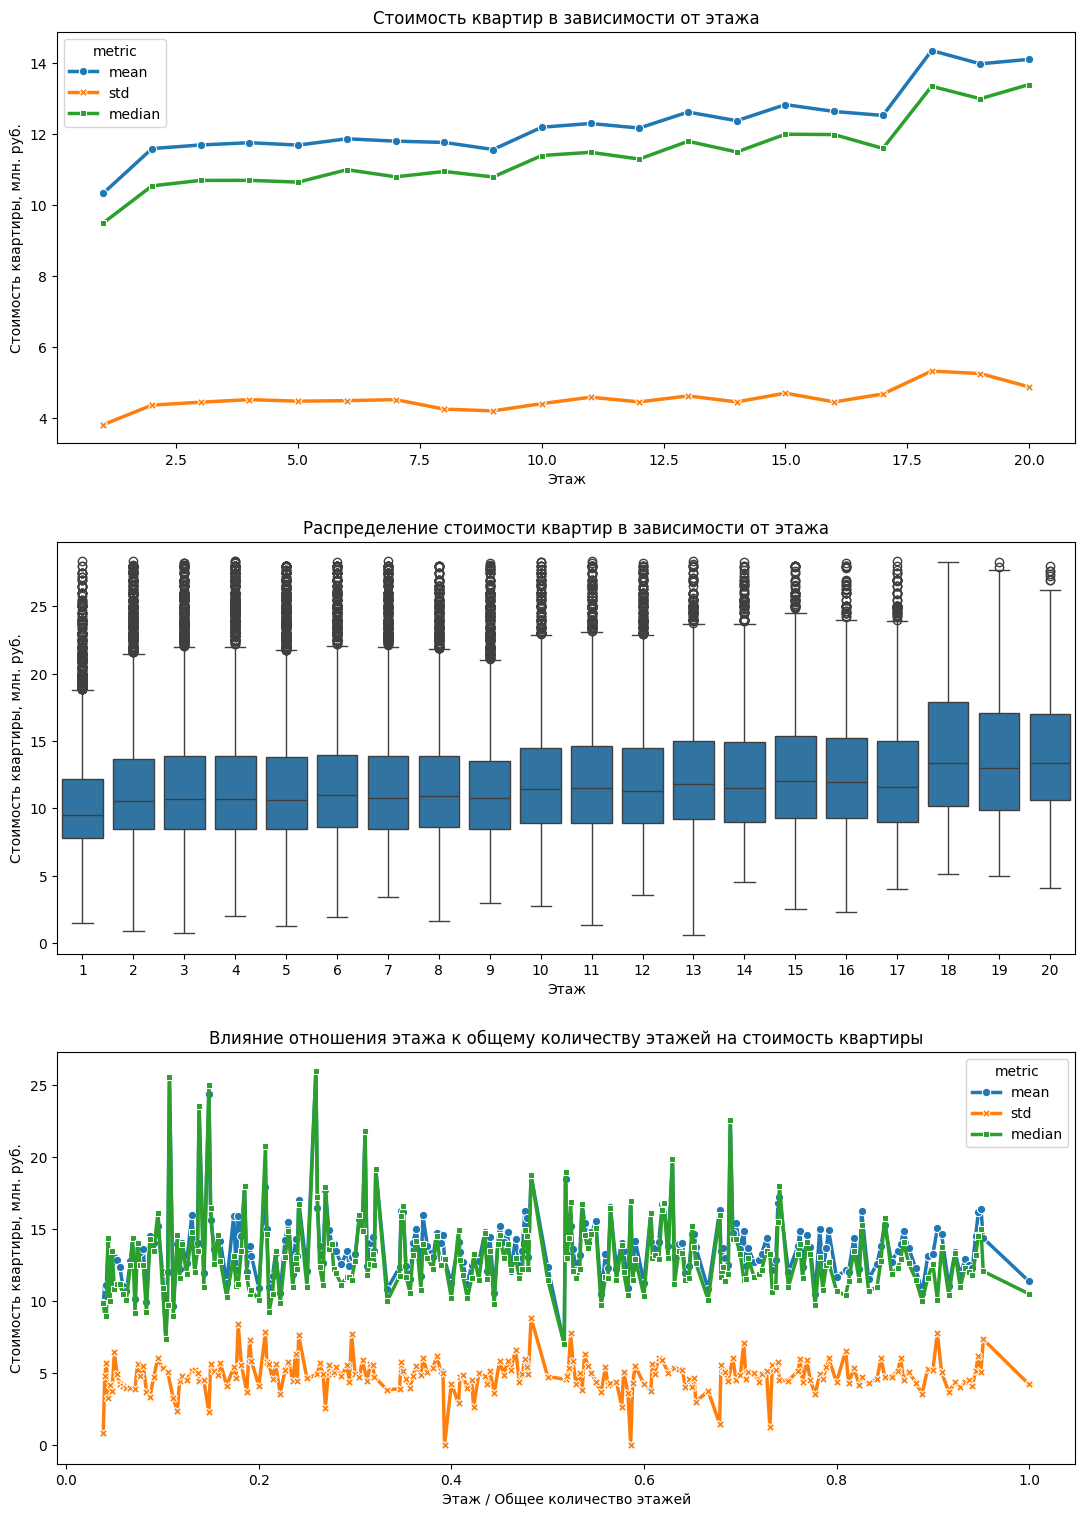

In [110]:
fig, ax = plt.subplots(3, 1, figsize=(12, 16))
fig.tight_layout(pad=5)

x = 'floor'
agg_df = df.groupby(x)[target].agg(['mean', 'std', 'median']).reset_index()

stats = agg_df.melt(
    id_vars=[x],
    value_vars=['mean', 'std', 'median'],
    var_name='metric', 
    value_name='price'
)

sns.lineplot(
    data=stats,
    x=x,
    y=target,
    hue='metric',
    style='metric', 
    markers=True,
    dashes=False,
    palette='tab10',
    linewidth=2.5,
    ax=ax[0]
)

ax[0].set_title('Стоимость квартир в зависимости от этажа')
ax[0].set_xlabel("Этаж")
ax[0].set_ylabel("Стоимость квартиры, млн. руб.")

ax[0].yaxis.set_major_formatter(million_formatter)

sns.boxplot(
    data=df,
    x=x,
    y=target,
    ax=ax[1]
)

ax[1].set_title('Распределение стоимости квартир в зависимости от этажа')
ax[1].set_xlabel("Этаж")
ax[1].set_ylabel("Стоимость квартиры, млн. руб.")

ax[1].yaxis.set_major_formatter(million_formatter)

x = 'floor_rate'
df_filtered[x] = df_filtered['floor'] / df_filtered['floors_total']
agg_df = df_filtered.groupby(x)[target].agg(['mean', 'std', 'median']).reset_index()

stats = agg_df.melt(
    id_vars=[x],
    value_vars=['mean', 'std', 'median'],
    var_name='metric', 
    value_name='price'
)

sns.lineplot(
    data=stats,
    x=x,
    y=target,
    hue='metric',
    style='metric', 
    markers=True,
    dashes=False,
    palette='tab10',
    linewidth=2.5,
    ax=ax[2]
)

ax[2].set_title('Влияние отношения этажа к общему количеству этажей на стоимость квартиры')
ax[2].set_xlabel("Этаж / Общее количество этажей")
ax[2].set_ylabel("Стоимость квартиры, млн. руб.")

ax[2].yaxis.set_major_formatter(million_formatter)

plt.savefig(ASSETS_DIR + '/price_and_floor_correlation.png')
plt.show()

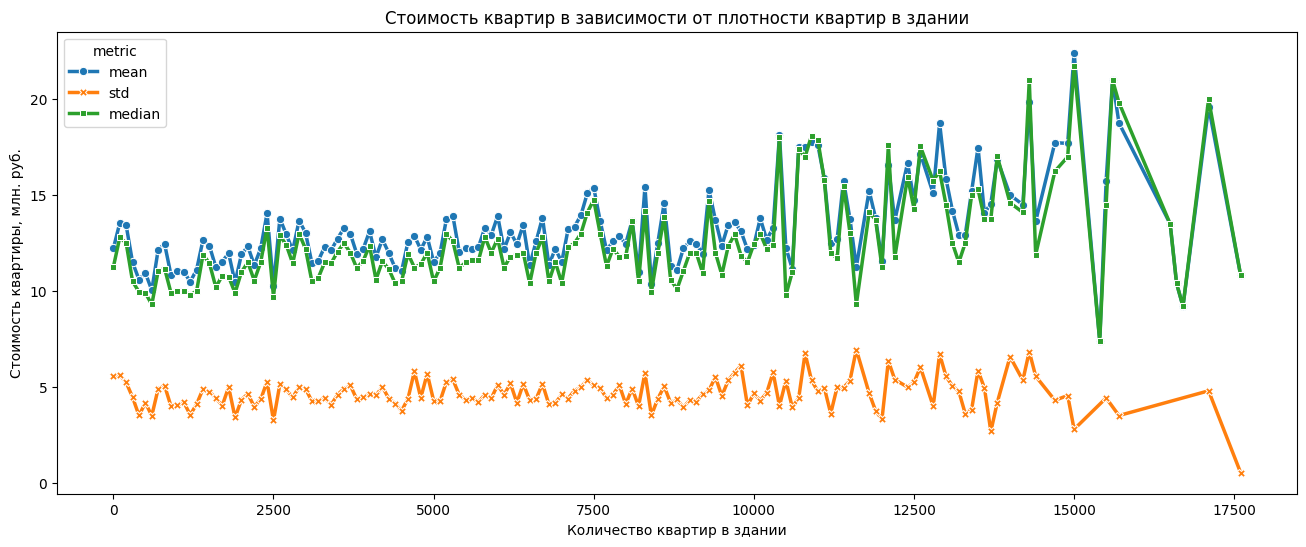

In [49]:
x = 'flats_density'
step = 100
df_filtered[x] = (df['floors_total'] * df['flats_count'] // step) * step
agg_df = df_filtered.groupby(x)[target].agg(['mean', 'std', 'median']).reset_index()

stats = agg_df.melt(
    id_vars=[x],
    value_vars=['mean', 'std', 'median'],
    var_name='metric', 
    value_name='price'
)

plt.figure(figsize=(16, 6))

sns.lineplot(
    data=stats,
    x=x,
    y=target,
    hue='metric',
    style='metric', 
    markers=True,
    dashes=False,
    palette='tab10',
    linewidth=2.5
)

plt.title('Стоимость квартир в зависимости от плотности квартир в здании')
plt.xlabel("Количество квартир в здании")
plt.ylabel("Стоимость квартиры, млн. руб.")

plt.gca().yaxis.set_major_formatter(million_formatter)

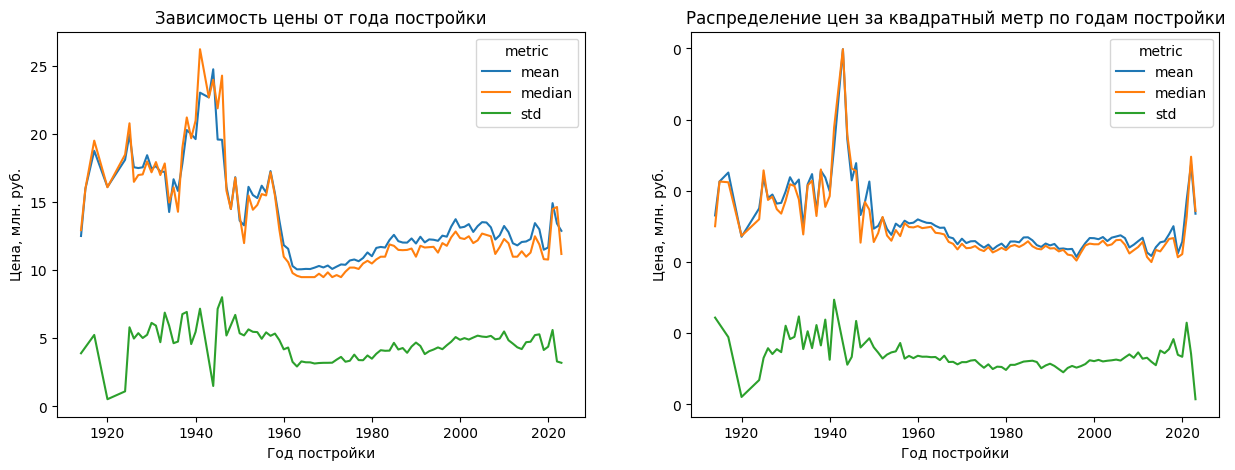

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

x = 'build_year'
agg_df = df_filtered.groupby(x)[target].agg(['mean', 'median', 'std']).reset_index()

stats = agg_df.melt(
    id_vars=x,
    value_vars=['mean', 'median', 'std'],
    var_name='metric',
    value_name='price'
)

sns.lineplot(
    data=stats,
    x=x,
    y='price',
    hue='metric',
    ax=axs[0]
)
axs[0].set_title('Зависимость цены от года постройки')
axs[0].set_xlabel('Год постройки')
axs[0].set_ylabel('Цена, млн. руб.')

axs[0].yaxis.set_major_formatter(million_formatter)

# Сохраняем в отдельном фрейме чтобы избежать утечки данных
df_filtered['price_per_m2'] = df['price'] / df['total_area']
agg_df = df_filtered.groupby(x)['price_per_m2'].agg(['mean', 'median', 'std']).reset_index()

stats = agg_df.melt(
    id_vars=x,
    value_vars=['mean', 'median', 'std'],
    var_name='metric',
    value_name='price_per_m2'
)

sns.lineplot(
    data=stats,
    x=x,
    y='price_per_m2',
    hue='metric',
    ax=axs[1]
)
axs[1].set_title('Распределение цен за квадратный метр по годам постройки')
axs[1].set_xlabel('Год постройки')
axs[1].set_ylabel('Цена, млн. руб.')

axs[1].yaxis.set_major_formatter(million_formatter)

plt.savefig(ASSETS_DIR + '/build_year_price_correlation.png')
plt.show()

Для квартир до 1960-х годов наблюдается более высокий уровень цен за счет того, что они по большей части находятся в центре города. Но при пересчете цены за квадратный метр разница в ценах не настолько кардинальная, что может говорить о том, что в площадь у квартир того периода в среднем больше.

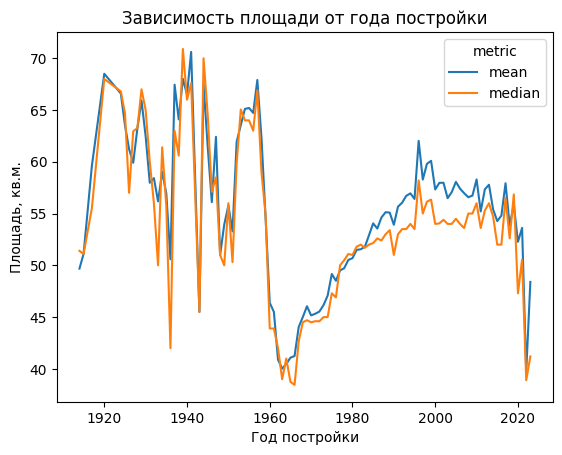

In [45]:
x = 'build_year'
agg_df = df_filtered.groupby(x)['total_area'].agg(['mean', 'median']).reset_index()

stats = agg_df.melt(
    id_vars=x,
    value_vars=['mean', 'median'],
    var_name='metric',
    value_name='total_area'
)

sns.lineplot(
    data=stats,
    x=x,
    y='total_area',
    hue='metric'
)
plt.title('Зависимость площади от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Площадь, кв.м.')

plt.savefig(ASSETS_DIR + '/total_area_by_year.png')
plt.show()

<Figure size 1200x1000 with 0 Axes>

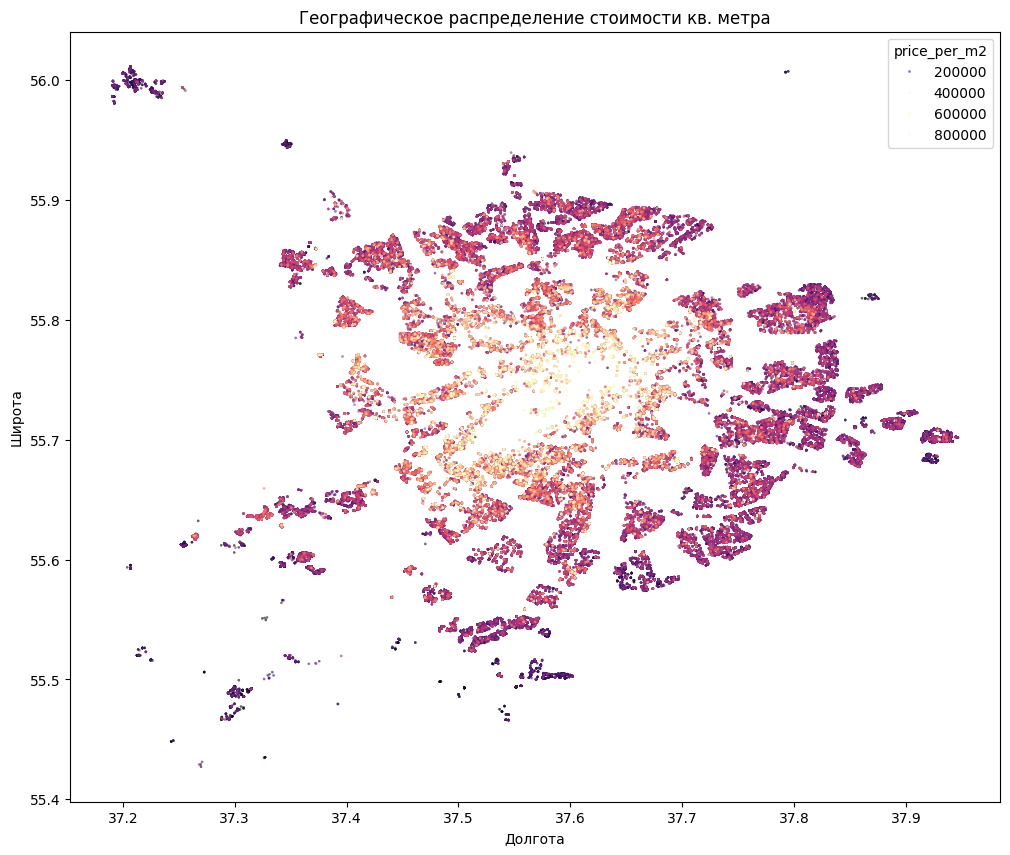

In [ ]:
plt.figure(figsize=(12, 10))
vmin = df_filtered['price_per_m2'].quantile(0.02)
vmax = df_filtered['price_per_m2'].quantile(0.98)

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_filtered.sort_values('price_per_m2'),
    x='longitude', 
    y='latitude', 
    hue='price_per_m2', 
    hue_norm=(vmin, vmax),
    palette='magma',
    alpha=0.6,
    s=3, 
    edgecolor=None
)
plt.title('Географическое распределение стоимости кв. метра')
plt.xlabel('Долгота')
plt.ylabel('Широта')

plt.savefig(ASSETS_DIR + '/price_per_m2_temperature_map.png')
plt.show()

В центре города очевидно самая дорогая недвижимость, но во многих районах есть как дешевые, так и дорогие квартиры. Они могут сравниться с квартирами в центре за счет других признаков.

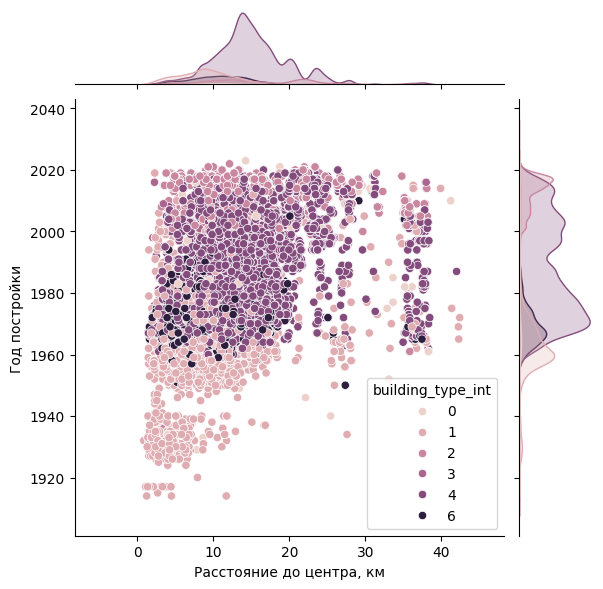

In [11]:
sns.jointplot(
    data=df,
    x="distance_to_center",
    y="build_year",
    hue="building_type_int"
)
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Год постройки')

plt.savefig(ASSETS_DIR + '/building_type_distance_distribution.png')
plt.show()

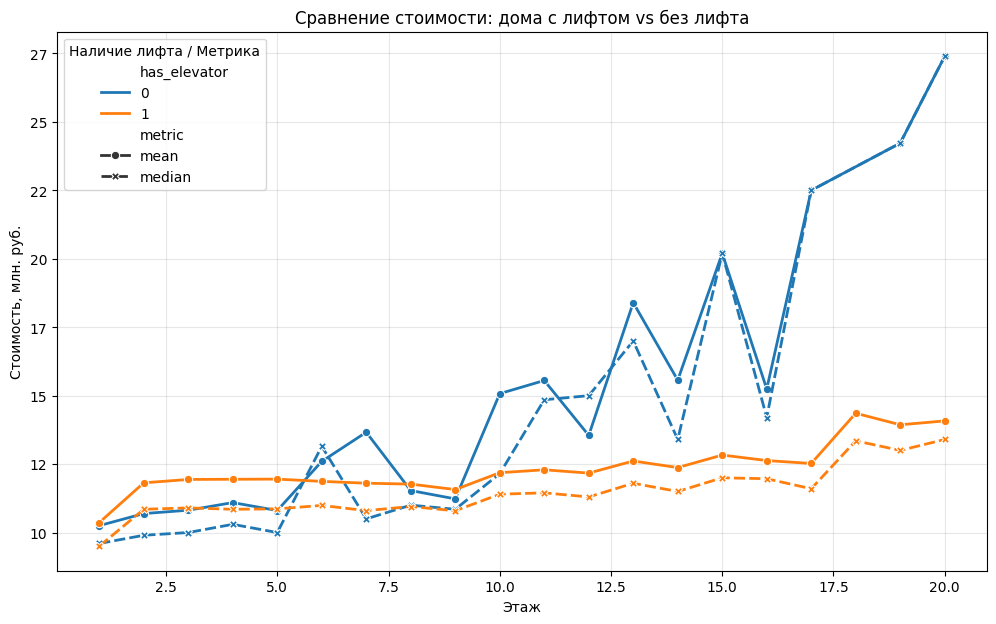

In [18]:
x = 'floor'

agg_df = df.groupby([x, 'has_elevator'])[target].agg(['mean', 'median']).reset_index()

stats = agg_df.melt(
    id_vars=[x, 'has_elevator'], 
    value_vars=['mean', 'median'], 
    var_name='metric', 
    value_name='price'
)

plt.figure(figsize=(12, 7))

sns.lineplot(
    data=stats,
    x=x,
    y='price',
    hue='has_elevator',
    style='metric',
    markers=True,
    linewidth=2
)

plt.title('Сравнение стоимости: дома с лифтом vs без лифта')
plt.xlabel('Этаж')
plt.ylabel('Стоимость, млн. руб.')
plt.gca().yaxis.set_major_formatter(million_formatter)
plt.grid(True, alpha=0.3)
plt.legend(title='Наличие лифта / Метрика')
plt.savefig(ASSETS_DIR + '/elevator_price_distribution.png')
plt.show()

## 2.5 Выводы после EDA
1. Присутствуют квартиры с нулевыми `kitchen_area` и `living_area` одновременною, что может говорить либо о пропусках в данных, либо о том, что это студии, которые не были помечены, поскольку в колонке `studio` есть только значения `False`. После маркировки доля студий составляет 3.95% от общего количества, что соответствует реальной статистике
2. График годов постройки визуально можно разделить на три группы: дома довоенного периода, послевоенного советского периода и периода современной России.
3. Классы 0 и 1 - в основном советский период, классы 2 и 3 - в основном современный период
4. Квартиры в постройках старше 1960 года в среднем стоят заметно дороже, поскольку большая их часть находится в пределах 20км от центра города.
5. Квартиры на первом и последнем этаже в среднем стоят дешевле квартир на остальных этажах.
6. В домах с лифтом его наличие не сильно влияет на стоимость, в то время как в домах без лифта этаж и стоимость имеют заметно более высокую корреляцию
7. В среднем самые дорогие квартиры имеют высоту потолков 2,79 м и сильно выделяются на остальном фоне. Так же в одну ценовую группу дорогих квартир можно выделить квартиры с высотой потолков 2.56, 2.95, 2.87, 3.00, 2.66, 2.62, 2.53 м.
8. Признаки наиболее коррелирующие с целевой переменной:
    - `total_area`
    - `kitchen_area`
    - `living_area`
    - `rooms`
    - `ceiling_height`
    - `distance_to_center`
9. Наличие лифта не зависит от типа здания
10. Все типы зданий имеют этажность до 20 этажей, из-за чего можно только косвенно судить о типе здания
11. Дорогая недвижимость находится не только в центре города, во многих районах есть как дешевые, так и дорогие квартиры. Они могут сравниться с квартирами в центре за счет других признаков.
12. Для квартир до 1960-х годов наблюдается более высокий уровень цен за счет того, что они по большей части находятся в центре города. Но при пересчете цены за квадратный метр разница в ценах не настолько кардинальная, что может говорить о том, что в площадь у квартир того периода в среднем больше.
13. В этом диапазоне площадей 100-115 кв.м. больше дешевых квартир, чем элитных.

## 2.6 логирование артефактов в MLflow

In [3]:
import mlflow
import os
from dotenv import load_dotenv

load_dotenv()

TRACKING_SERVER_HOST = os.environ['TRACKING_SERVER_HOST']
TRACKING_SERVER_PORT = os.environ['TRACKING_SERVER_PORT']
MLFLOW_TRACKING_URI = f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}"

EXPERIMENT_NAME = os.environ['EXPERIMENT_NAME']
RUN_NAME = 'eda_research'

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_registry_uri(MLFLOW_TRACKING_URI)

/home/mle-user/mle_projects/mle-project-sprint-2-v001/venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:383: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [4]:
experiment_id = mlflow.set_experiment(EXPERIMENT_NAME).experiment_id

In [6]:
with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    mlflow.log_artifacts(ASSETS_DIR)
    mlflow.log_artifact('eda_research.ipynb')

#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели
После тщательного исследовательского анализа данных (EDA), вы, скорее всего, сформировали несколько гипотез относительно новых признаков, которые могут улучшить качество вашей модели. На этом этапе, мы предлагаем вам приступить к генерации новых признаков и последующему обучению модели, используя два подхода:

Ручная генерация признаков: Используйте ваше понимание данных и результаты EDA для создания новых признаков.
Автоматическая генерация признаков: Воспользуйтесь библиотеками для автоматической генерации признаков, чтобы облегчить и ускорить этот процесс.
Важно: Для признаков, созданных вручную, рекомендуется использовать объекты sklearn, такие как Pipeline и ColumnTransformer. Это позволит автоматизировать процесс преобразования данных и облегчить поддержку вашего проекта.

После генерации новых признаков, наступает время обучить новую версию вашей модели, используя эти признаки. Не забудьте залогировать все результаты, включая новые признаки, параметры модели и метрики качества, в MLflow для удобства отслеживания изменений и результатов.

Рекомендуемые шаги:

- Определение и генерация новых признаков на основе ваших гипотез.
- Использование библиотек для автоматической генерации признаков, если это применимо.
- Интеграция новых признаков в вашу модель с помощью Pipeline или ColumnTransformer для ручно созданных признаков.
- Обучение новой версии модели с использованием всех доступных признаков.
- Логирование результатов в MLflow для документирования и анализа эффективности новых признаков и модели.

Этот этап проекта критически важен для повышения точности и эффективности вашей модели. Тщательная работа на этом этапе может существенно повлиять на итоговое качество моделирования.


In [ ]:
# 3.1 ручная генерация признаков
df['studio'] = ((df['living_area'] == 0) & (df['kitchen_area'] == 0)).astype(int)

In [ ]:
# 3.2 оборачивание всех преобразований в объекты sklearn

In [ ]:
# 3.3 автоматическая генерация признаков

In [ ]:
# 3.4 обучение новой версии модели

In [ ]:
# 3.5 логирование артефактов в MLflow

#### Этап 4: Отбор Признаков и Обучение Новой Версии Модели
Создание новых признаков — это лишь часть работы. Следующий важный шаг — это убедиться в том, что каждый из этих признаков действительно вносит положительный вклад в качество модели. Некоторые признаки могут оказывать отрицательное влияние на модель, поэтому их следует исключить из анализа.

На этом этапе, мы рекомендуем вам применить различные методы отбора признаков для того, чтобы определить и удалить те признаки, которые не улучшают качество вашей модели. Цель этого этапа — максимизировать производительность модели, удалив избыточные или неинформативные признаки.

После тщательного отбора признаков, пора обучить новую версию вашей модели, уже без негативно влияющих на неё признаков. Важно залогировать результаты этого этапа, включая измененный набор признаков, параметры модели и полученные метрики качества, в MLflow для последующего анализа и сравнения.

Рекомендуемые шаги:

- Применение методов отбора признаков для идентификации и исключения признаков, ухудшающих качество модели.
- Анализ влияния каждого признака на модель, чтобы понять, какие из них наиболее ценные.
- Обучение новой версии модели без негативно влияющих признаков.
- Логирование всех изменений и результатов в MLflow, включая конечный набор признаков, параметры модели и метрики качества.

Этот этап не только поможет улучшить качество вашей модели, но и даст глубокое понимание о важности и влиянии отдельных признаков на результаты моделирования.


In [ ]:
# Признак flat_id не нужен для обучения модели, так как он уникален для каждого объекта
del df['flat_id']
# Признак building_id тоже особого влияния на модель не окажет, а может и приведет к переобучению если будет утечка данных
del df['building_id']

In [ ]:
# 4.1 Отбор признаков при помощи метода номер 1

In [ ]:
# 4.2 Отбор признаков при помощи метода номер 2

In [ ]:
# 4.3 Анализ отобранных признаков при помощи двух методов и формирование финального списка с признаками для модели

In [ ]:
# 4.4 Обучение новой версии модели

In [ ]:
# 4.5 Логирование всех артефактов в MLflow

### Этап 5 - подбор гиперпараметров и обучение новой версии модели
После того как мы уделили значительное внимание качеству модели через создание и отбор признаков, пришло время для финального штриха — подбора гиперпараметров. Этот этап является ключевым в финальной части проекта второго спринта, где ваша задача — оптимизировать гиперпараметры модели для достижения наилучшего качества.

Рекомендуется подобрать гиперпараметры как минимум двумя различными методами (например, с использованием Grid Search и Random Search), чтобы вы могли сравнить результаты и выбрать наиболее эффективный набор гиперпараметров для вашей модели. После определения оптимальных гиперпараметров, наступает время обучить финальную версию модели, используя ваши новые признаки.

Рекомендуемые шаги:

- Выбор методов для подбора гиперпараметров: Определитесь с методами, которые вы будете использовать для подбора гиперпараметров (например, Grid Search, Random Search, Bayesian Optimization).
- Подбор гиперпараметров: Примените выбранные методы для нахождения оптимальных значений гиперпараметров вашей модели.
- Сравнение результатов: Анализируйте и сравнивайте результаты, полученные различными методами, для определения наилучшего набора гиперпараметров.
- Обучение финальной модели: Используя выбранные гиперпараметры, обучите финальную версию вашей модели на новых признаках.
- Документирование процесса и результатов: Залогируйте все шаги и результаты в MLflow, включая сравнение методов подбора гиперпараметров и характеристики финальной модели.

Этот этап позволит вам максимально улучшить качество вашей модели перед финальной оценкой, предоставив полное понимание важности и влияния гиперпараметров на производительность модели.

In [ ]:
# 5.1 Подбор гиперпарметров при мощи метода номер 1

In [ ]:
# 5.2 Подбор гиперпарметров при мощи метода номер 2

In [ ]:
# 5.3 Формирование списка гиперпараметров для новой модели

In [ ]:
# 5.4 Обуение финальной версии модели

In [ ]:
# 5.5 Логирование артефактов в MLflow